In [2]:
import pandas as pd
import numpy as np
import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, TimeDistributed
import matplotlib.pyplot as plt

In [1]:
!pip install --upgrade tensorflow==2.14.0

  Obtaining dependency information for tensorflow==2.14.0 from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata (4.8 kB)
  Obtaining dependency information for tensorboard<2.15,>=2.14 from https://files.pythonhosted.org/packages/73/a2/66ed644f6ed1562e0285fcd959af17670ea313c8f331c46f79ee77187eb9/tensorboard-2.14.1-py3-none-any.whl.metadata
  Using cached tensorboard-2.14.1-py3-none-any.whl.metadata (1.7 kB)
  Obtaining dependency information for tensorflow-estimator<2.15,>=2.14.0 from https://files.

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Python311\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Python311\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Python311\Lib\socket.py", line 706, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python311\Lib\ssl.py", line 1278, in recv_into
    r

In [3]:
stocks = pd.read_csv('C:/Users/kaush/Documents/CDS/sp500_returns_with_dates.csv')
bonds = pd.read_csv('C:/Users/kaush/Documents/CDS/us_bond_data_cleaned.csv')
dollars = pd.read_csv('C:/Users/kaush/Documents/CDS/us_dollar_returns2022 onwards.csv')

In [3]:
stocks.head()

,Date,Returns
0,2018-10-11,-0.020573
1,2018-10-12,0.014206
2,2018-10-15,-0.005905
3,2018-10-16,0.021496
4,2018-10-17,-0.000253


In [4]:
stocks.shape

(1256, 2)

In [5]:
stocks.isna().sum()

Date       0
Returns    0
dtype: int64

In [6]:
stocks['Asset'] = 'Stocks'

In [7]:
stocks.head()

,Date,Returns,Asset
0,2018-10-11,-0.020573,Stocks
1,2018-10-12,0.014206,Stocks
2,2018-10-15,-0.005905,Stocks
3,2018-10-16,0.021496,Stocks
4,2018-10-17,-0.000253,Stocks


In [8]:
bonds.head()

,Date,Close,Returns
0,2018-10-10,3.225,NaN
1,2018-10-11,3.133,-0.028527
2,2018-10-12,3.141,0.002554
3,2018-10-15,3.163,0.007004
4,2018-10-16,3.156,-0.002213


In [9]:
bonds.shape

(1257, 3)

In [10]:
bonds.isna().sum()

Date       0
Close      0
Returns    1
dtype: int64

In [11]:
bonds['Asset'] = 'Bonds'

In [12]:
bonds.head()

,Date,Close,Returns,Asset
0,2018-10-10,3.225,NaN,Bonds
1,2018-10-11,3.133,-0.028527,Bonds
2,2018-10-12,3.141,0.002554,Bonds
3,2018-10-15,3.163,0.007004,Bonds
4,2018-10-16,3.156,-0.002213,Bonds


In [13]:
bonds_redefined = bonds[['Date', 'Returns', 'Asset']]
bonds_redefined

,Date,Returns,Asset
0,2018-10-10,NaN,Bonds
1,2018-10-11,-0.028527,Bonds
2,2018-10-12,0.002554,Bonds
3,2018-10-15,0.007004,Bonds
4,2018-10-16,-0.002213,Bonds
...,...,...,...
1252,2023-10-03,0.025411,Bonds
1253,2023-10-04,-0.013953,Bonds
1254,2023-10-05,-0.003802,Bonds
1255,2023-10-06,0.014204,Bonds


In [14]:
dollars.head()

,Date,Returns
0,03/01/2022,NaN
1,04/01/2022,0.000531
2,05/01/2022,0.003453
3,06/01/2022,-0.002470
4,07/01/2022,0.004510


In [15]:
dollars.shape

(460, 2)

In [16]:
dollars.isna().sum()

Date        0
Returns    35
dtype: int64

In [17]:
dollars['Returns'] = dollars['Returns'].ffill()

In [18]:
dollars.isna().sum()

Date       0
Returns    1
dtype: int64

In [19]:
dollars['Returns'] = dollars['Returns'].bfill()

In [20]:
dollars.head()

,Date,Returns
0,03/01/2022,0.000531
1,04/01/2022,0.000531
2,05/01/2022,0.003453
3,06/01/2022,-0.002470
4,07/01/2022,0.004510


In [21]:
dollars['Asset'] = 'Cash'

In [22]:
dollars.head()

,Date,Returns,Asset
0,03/01/2022,0.000531,Cash
1,04/01/2022,0.000531,Cash
2,05/01/2022,0.003453,Cash
3,06/01/2022,-0.002470,Cash
4,07/01/2022,0.004510,Cash


In [23]:
# asset_df = pd.concat([stocks, bonds_redefined, dollars], ignore_index=True)

In [24]:
# asset_df.head()

,Date,Returns,Asset
0,2018-10-11,-0.020573,Stocks
1,2018-10-12,0.014206,Stocks
2,2018-10-15,-0.005905,Stocks
3,2018-10-16,0.021496,Stocks
4,2018-10-17,-0.000253,Stocks


In [25]:
# asset_df.shape

(2973, 3)

In [26]:
# asset_df['Asset'].value_counts()

Asset
Bonds     1257
Stocks    1256
Cash       460
Name: count, dtype: int64

In [27]:
# df = asset_df.sample(frac=1).reset_index(drop=True)

In [28]:
# df.head()

,Date,Returns,Asset
0,2022-08-19,0.037847,Bonds
1,2020-10-23,-0.008255,Bonds
2,2022-03-14,-0.007421,Stocks
3,2019-01-10,0.001100,Bonds
4,18/11/2022,0.000774,Cash


In [29]:
# df1= df.set_index('Date')
# df1.head()

,Returns,Asset
Date,,
2022-08-19,0.037847,Bonds
2020-10-23,-0.008255,Bonds
2022-03-14,-0.007421,Stocks
2019-01-10,0.001100,Bonds
18/11/2022,0.000774,Cash


In [30]:
# df1['Returns'] = df1['Returns'].ffill()

In [31]:
# df1['Returns'].isna().sum()

0

In [32]:
# df1['Returns'].min(), df1['Returns'].max()

(-0.2932010853111354, 0.4989980089182402)

In [32]:
# le = preprocessing.LabelEncoder()
# df1['Asset'] = le.fit_transform(df1['Asset'])

In [33]:
# df1.head()

,Returns,Asset
Date,,
2020-01-03,0.017829,1
2019-04-30,-0.010647,0
2022-10-10,-0.007492,2
2019-11-06,-0.027867,0
2019-02-12,0.013531,1


In [34]:
# X = df1[['Returns']].values
# y = df1['Asset'].values

In [35]:
# X

array([[ 0.01782851],
       [-0.01064667],
       [-0.00749246],
       ...,
       [ 0.00746021],
       [-0.0068689 ],
       [-0.00540085]])

In [36]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# X_train

array([[ 0.01086955],
       [ 0.00414638],
       [ 0.00034269],
       ...,
       [ 0.01779929],
       [ 0.00901664],
       [-0.01071029]])

In [38]:
# train_df = pd.DataFrame(X_train, columns=['Returns'])
# test_df = pd.DataFrame(X_test, columns=['Returns'])

In [39]:
# train_df.head()

,Returns
0,0.010870
1,0.004146
2,0.000343
3,0.015174
4,0.007500


In [40]:
# X_train = X_train.reshape(-1, 1, X_train.shape[1])
# X_test = X_test.reshape(-1, 1, X_test.shape[1])

In [41]:
# X_train[:5]

array([[[0.01086955]],

       [[0.00414638]],

       [[0.00034269]],

       [[0.01517371]],

       [[0.00750008]]])

In [42]:
# train_df = df1.iloc[:int(len(df1) * 0.8)]
# test_df = df1.iloc[int(len(df1) * 0.8):]

In [43]:
# len(train_df), len(test_df)

(2191, 548)

In [44]:
# np.shape(train_df)

(2191, 1)

In [45]:
# train_df.shape[0]

2191

In [46]:
# model = Sequential()
# model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dense(3, activation='softmax'))

In [47]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
# model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
69/69 [==============================] - 1s 2ms/step - loss: 1.0741 - accuracy: 0.5011
Epoch 2/100
69/69 [==============================] - 0s 1ms/step - loss: 1.0104 - accuracy: 0.4610
Epoch 3/100
69/69 [==============================] - 0s 1ms/step - loss: 0.9502 - accuracy: 0.4792
Epoch 4/100
69/69 [==============================] - 0s 958us/step - loss: 0.9239 - accuracy: 0.4975
Epoch 5/100
69/69 [==============================] - 0s 1ms/step - loss: 0.9172 - accuracy: 0.5025
Epoch 6/100
69/69 [==============================] - 0s 1ms/step - loss: 0.9154 - accuracy: 0.5710
Epoch 7/100
69/69 [==============================] - 0s 1ms/step - loss: 0.9139 - accuracy: 0.5614
Epoch 8/100
69/69 [==============================] - 0s 957us/step - loss: 0.9113 - accuracy: 0.5842
Epoch 9/100
69/69 [==============================] - 0s 919us/step - loss: 0.9082 - accuracy: 0.5988
Epoch 10/100
69/69 [==============================] - 0s 925us/step - loss: 0.9050 - accuracy: 0.6107
E

In [49]:
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Test loss: {loss}, Test accuracy: {accuracy}')

18/18 [==============================] - 0s 1ms/step - loss: 0.8815 - accuracy: 0.6259
Test loss: 0.881486713886261, Test accuracy: 0.6259124279022217


In [50]:
# prediction = model.predict(X_test)

18/18 [==============================] - 0s 974us/step


In [51]:
# prediction

array([[0.43109727, 0.08445775, 0.484445  ],
       [0.57662517, 0.09505561, 0.32831916],
       [0.33151975, 0.07315885, 0.5953215 ],
       ...,
       [0.25574055, 0.06242053, 0.68183887],
       [0.39950448, 0.0812152 , 0.5192804 ],
       [0.5360596 , 0.09286331, 0.37107715]], dtype=float32)

In [52]:
# model.predict([[[ 0.03427]]])

1/1 [==============================] - 0s 36ms/step


array([[0.699391  , 0.11415606, 0.1864529 ]], dtype=float32)

In [53]:
# mean_returns = test_df['Returns'].mean(axis=0)
# covariance_matrix = test_df.cov()

In [54]:
# mean_returns, covariance_matrix

(0.0007684662541977238,
           Returns
 Returns  0.001123)

In [55]:
# optimal_weights = np.dot(np.linalg.inv(covariance_matrix), mean_returns)

In [56]:
# optimal_weights

array([[0.68418569]])

In [57]:
# user_asset_allocation = {}
# for i in range(len(df1.columns)):
#     user_asset_allocation[df1.columns[i]] = optimal_weights * 100

In [58]:
# user_asset_allocation

{'Returns': array([[68.41856864]]), 'Asset': array([[68.41856864]])}

In [23]:
stocks.head()

,Date,Returns,Asset
0,2018-10-11,-0.020573,Stocks
1,2018-10-12,0.014206,Stocks
2,2018-10-15,-0.005905,Stocks
3,2018-10-16,0.021496,Stocks
4,2018-10-17,-0.000253,Stocks


In [24]:
stocks.shape

(1256, 3)

In [25]:
# stocks_date = stocks['Date'].unique()

In [26]:
# stocks_date

array(['2018-10-11', '2018-10-12', '2018-10-15', ..., '2023-10-05',
       '2023-10-06', '2023-10-09'], dtype=object)

In [27]:
# len(stocks_date)

1256

In [28]:
bonds.head()

,Date,Close,Returns,Asset
0,2018-10-10,3.225,NaN,Bonds
1,2018-10-11,3.133,-0.028527,Bonds
2,2018-10-12,3.141,0.002554,Bonds
3,2018-10-15,3.163,0.007004,Bonds
4,2018-10-16,3.156,-0.002213,Bonds


In [29]:
bonds_date = bonds['Date'].unique()

In [30]:
len(bonds_date)

1257

In [31]:
dollars.head()

,Date,Returns,Asset
0,03/01/2022,0.000531,Cash
1,04/01/2022,0.000531,Cash
2,05/01/2022,0.003453,Cash
3,06/01/2022,-0.002470,Cash
4,07/01/2022,0.004510,Cash


In [32]:
dollars_date = dollars['Date'].unique()

In [33]:
len(dollars_date)

460

In [34]:
dollars_date[225]

'14/11/2022'

In [35]:
bonds_date[226]

'2019-09-05'

In [36]:
s_new = stocks.rename(columns={'Returns': 'Returns_s', 'Asset': 'Asset_s'})

In [37]:
s_new.head(1)

,Date,Returns_s,Asset_s
0,2018-10-11,-0.020573,Stocks


In [38]:
s_new['Date'] = pd.to_datetime(s_new['Date'])

In [39]:
s_new = s_new.set_index('Date')
s_new.head(2)

,Returns_s,Asset_s
Date,,
2018-10-11,-0.020573,Stocks
2018-10-12,0.014206,Stocks


In [40]:
b_new = bonds.rename(columns={'Returns': 'Returns_b', 'Asset': 'Asset_b'})
b_new['Date'] = pd.to_datetime(b_new['Date'])
b_new = b_new.set_index('Date')
b_new.head(2)

,Close,Returns_b,Asset_b
Date,,,
2018-10-10,3.225,NaN,Bonds
2018-10-11,3.133,-0.028527,Bonds


In [41]:
sb_df = pd.concat([s_new, b_new], axis=1)

In [42]:
sb_df.head()

,Returns_s,Asset_s,Close,Returns_b,Asset_b
Date,,,,,
2018-10-10,NaN,NaN,3.225,NaN,Bonds
2018-10-11,-0.020573,Stocks,3.133,-0.028527,Bonds
2018-10-12,0.014206,Stocks,3.141,0.002554,Bonds
2018-10-15,-0.005905,Stocks,3.163,0.007004,Bonds
2018-10-16,0.021496,Stocks,3.156,-0.002213,Bonds


In [43]:
sb_df['total_returns'] = sb_df['Returns_s']+sb_df['Returns_b']
sb_df.head()

,Returns_s,Asset_s,Close,Returns_b,Asset_b,total_returns
Date,,,,,,
2018-10-10,NaN,NaN,3.225,NaN,Bonds,NaN
2018-10-11,-0.020573,Stocks,3.133,-0.028527,Bonds,-0.049100
2018-10-12,0.014206,Stocks,3.141,0.002554,Bonds,0.016760
2018-10-15,-0.005905,Stocks,3.163,0.007004,Bonds,0.001099
2018-10-16,0.021496,Stocks,3.156,-0.002213,Bonds,0.019282


In [44]:
sb_df['Stocks_per_returns']= abs(sb_df['Returns_s']*100/sb_df['total_returns'])
sb_df['Bonds_per_returns']= abs(sb_df['Returns_b']*100/sb_df['total_returns'])
sb_df.head()

,Returns_s,Asset_s,Close,Returns_b,Asset_b,total_returns,Stocks_per_returns,Bonds_per_returns
Date,,,,,,,,
2018-10-10,NaN,NaN,3.225,NaN,Bonds,NaN,NaN,NaN
2018-10-11,-0.020573,Stocks,3.133,-0.028527,Bonds,-0.049100,41.900097,58.099903
2018-10-12,0.014206,Stocks,3.141,0.002554,Bonds,0.016760,84.764013,15.235987
2018-10-15,-0.005905,Stocks,3.163,0.007004,Bonds,0.001099,537.215052,637.215052
2018-10-16,0.021496,Stocks,3.156,-0.002213,Bonds,0.019282,111.477561,11.477561


In [45]:
sb_df.isna().sum()

Returns_s             1
Asset_s               1
Close                 0
Returns_b             1
Asset_b               0
total_returns         1
Stocks_per_returns    1
Bonds_per_returns     1
dtype: int64

In [46]:
df_new = sb_df[['total_returns', 'Stocks_per_returns', 'Bonds_per_returns']]
df_new.head()

,total_returns,Stocks_per_returns,Bonds_per_returns
Date,,,
2018-10-10,NaN,NaN,NaN
2018-10-11,-0.049100,41.900097,58.099903
2018-10-12,0.016760,84.764013,15.235987
2018-10-15,0.001099,537.215052,637.215052
2018-10-16,0.019282,111.477561,11.477561


In [47]:
df_new.isna().sum()

total_returns         1
Stocks_per_returns    1
Bonds_per_returns     1
dtype: int64

In [48]:
df_new = df_new.dropna()

In [49]:
df_new.isna().sum()

total_returns         0
Stocks_per_returns    0
Bonds_per_returns     0
dtype: int64

In [50]:
df_new_X = df_new[['total_returns']]
df_new_y = df_new[['Stocks_per_returns', 'Bonds_per_returns']]

In [51]:
X_new = df_new_X.values
y_new = df_new_y.values

In [52]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [53]:
X_train_new

array([[-0.04276732],
       [ 0.00034107],
       [ 0.00719346],
       ...,
       [ 0.00552235],
       [ 0.06044335],
       [-0.03291072]])

In [54]:
y_train_new

array([[7.38562255e+00, 1.07385623e+02],
       [7.56040964e+02, 8.56040964e+02],
       [1.58860600e+02, 5.88605998e+01],
       ...,
       [7.48819919e-01, 1.00748820e+02],
       [1.22776163e+01, 1.12277616e+02],
       [1.76142340e+01, 8.23857660e+01]])

In [219]:
# model1 = Sequential()
# model1.add(LSTM(units=50, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train_new.shape[0], X_train_new.shape[1])))
# model1.add(Dense(2, activation='linear'))

In [220]:
# model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [222]:
# history1 = model1.fit(X_train_new, y_train_new, epochs=150, batch_size=32)

Epoch 1/150
32/32 [==============================] - 0s 3ms/step - loss: 495413.7500 - accuracy: 0.7761
Epoch 2/150
32/32 [==============================] - 0s 3ms/step - loss: 495428.0000 - accuracy: 0.7761
Epoch 3/150
32/32 [==============================] - 0s 3ms/step - loss: 495421.3438 - accuracy: 0.7761
Epoch 4/150
32/32 [==============================] - 0s 4ms/step - loss: 495432.8750 - accuracy: 0.7761
Epoch 5/150
32/32 [==============================] - 0s 3ms/step - loss: 495415.8125 - accuracy: 0.7761
Epoch 6/150
32/32 [==============================] - 0s 3ms/step - loss: 495420.8750 - accuracy: 0.7761
Epoch 7/150
32/32 [==============================] - 0s 3ms/step - loss: 495420.9375 - accuracy: 0.7761
Epoch 8/150
32/32 [==============================] - 0s 4ms/step - loss: 495413.6875 - accuracy: 0.7761
Epoch 9/150
32/32 [==============================] - 0s 3ms/step - loss: 495412.1562 - accuracy: 0.7761
Epoch 10/150
32/32 [==============================] - 0s 4ms/ste

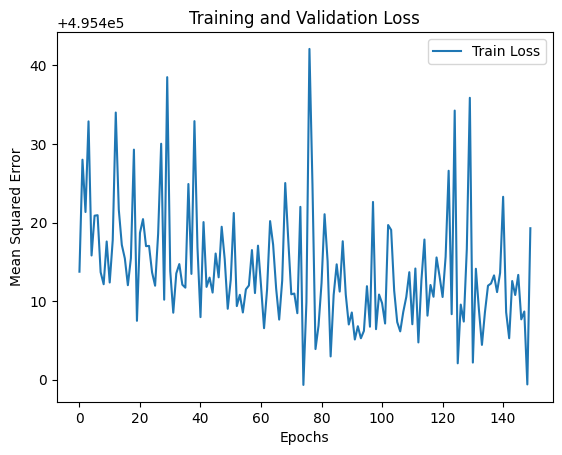

In [224]:
# # Plot training and validation loss
# plt.plot(history1.history['loss'], label='Train Loss')
# # plt.plot(history1.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Mean Squared Error')
# plt.legend()
# plt.title('Training and Validation Loss')
# plt.show()

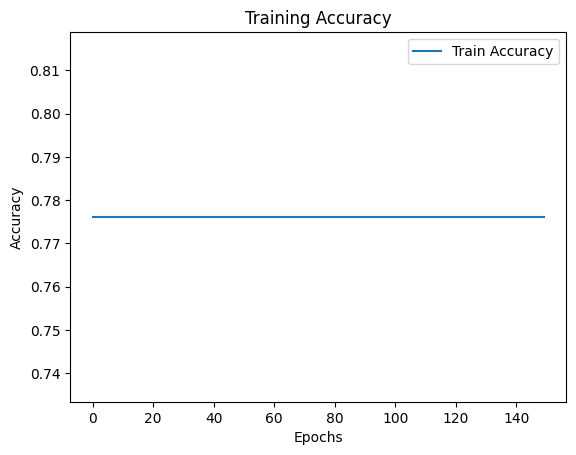

In [225]:
# # Plot training and validation loss
# plt.plot(history1.history['accuracy'], label='Train Accuracy')
# # plt.plot(history1.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.title('Training Accuracy')
# plt.show()

In [226]:
# loss = model1.evaluate(X_test_new, y_test_new)
# print(f'Test loss: {loss}')

8/8 [==============================] - 0s 3ms/step - loss: 63435.3477 - accuracy: 0.7937
Test loss: [63435.34765625, 0.7936508059501648]


In [227]:
# allocation = model1.predict([[0.00990698]])

1/1 [==============================] - 0s 340ms/step


In [228]:
# allocation

array([[134.5355 , 177.25919]], dtype=float32)

In [229]:
# allocation[0]

array([134.5355 , 177.25919], dtype=float32)

In [230]:
# def predict_allocations():
#     returns_value = float(input('Enter return value:'))
#     pred = model1.predict([[returns_value]])
#     print(f'Percentage allocation for Stocks= {pred[0][0]}\nPercentage allocation for bonds= {pred[0][1]}')

In [231]:
# predict_allocations()

Enter return value: 0.00990698


1/1 [==============================] - 0s 84ms/step
Percentage allocation for Stocks= 134.53550720214844
Percentage allocation for bonds= 177.25918579101562


In [ ]:
# bitvore for news sentiment analysis

In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [369]:
# df_new.isna().sum()

total_returns         0
Stocks_per_returns    0
Bonds_per_returns     0
dtype: int64

In [370]:
# # Load your dataset
# data = df_new

# # Extract relevant columns
# returns = data['total_returns'].values
# stock_percentage = data['Stocks_per_returns'].values
# bond_percentage = data['Bonds_per_returns'].values

In [371]:
# # Combine the input features and target variables
# X_ts = np.column_stack((returns, stock_percentage, bond_percentage))
# y_ts = np.column_stack((stock_percentage, bond_percentage))
# X_ts.shape, y_ts.shape

((1256, 3), (1256, 2))

In [372]:
# X_ts[0]

array([-4.91001426e-02,  4.19000975e+01,  5.80999025e+01])

In [373]:
# # Normalize the data
# scaler = StandardScaler()
# X_ts = scaler.fit_transform(X_ts)
# y_ts = scaler.fit_transform(y_ts)

In [374]:
# X_ts.shape, y_ts.shape

((1256, 3), (1256, 2))

In [375]:
# Split the dataset into training and testing sets
# X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(X_ts, y_ts, test_size=0.2, random_state=42)

In [376]:
# # Create time series sequences
# def create_sequences(data, sequence_length):
#     X = []
#     y = []
#     for i in range(len(data) - sequence_length):
#         X.append(data[i:i+sequence_length])
#         y.append(data[i+sequence_length])
#     return np.array(X), np.array(y)

In [377]:
# sequence_length = 10  # You can adjust this based on your dataset
# X_train_seq_ts, y_train_seq_ts = create_sequences(X_train_ts, sequence_length)
# X_test_seq_ts, y_test_seq_ts = create_sequences(X_test_ts, sequence_length)

In [378]:
# len(X_train_seq_ts)

994

In [379]:
# y_train_seq_ts

array([[ 3.49522069, -0.10940389, -0.20439812],
       [-0.38260755, -0.13466775, -0.17884504],
       [ 0.36332799, -0.18183962, -0.09539223],
       ...,
       [ 0.08679662, -0.19834366, -0.11208521],
       [ 1.28393292, -0.18042036, -0.09395672],
       [-0.75094552, -0.17212376, -0.14096023]])

In [380]:
# y_train_seq_ts = y_train_seq_ts[:, 1:]
# y_test_seq_ts = y_test_seq_ts[:, 1:]
# y_train_seq_ts

array([[-0.10940389, -0.20439812],
       [-0.13466775, -0.17884504],
       [-0.18183962, -0.09539223],
       ...,
       [-0.19834366, -0.11208521],
       [-0.18042036, -0.09395672],
       [-0.17212376, -0.14096023]])

In [381]:
# # Split the dataset into training and testing sets
# X_train_seq_ts, X_val_seq_ts, y_train_seq_ts, y_val_seq_ts = train_test_split(X_train_seq_ts, y_train_seq_ts, test_size=0.2, random_state=42)
# X_train_seq_ts

array([[[ 7.58696933e-01, -1.87192972e-01, -1.25718511e-01],
        [-3.81817924e+00, -1.79781679e-01, -1.33214648e-01],
        [ 1.02258474e+00, -1.79218325e-01, -1.33784452e-01],
        ...,
        [ 4.62061208e-01, -1.57524571e-01, -7.07988229e-02],
        [ 8.45050504e-02,  9.99782889e-02,  1.89651926e-01],
        [-3.36766077e-01, -1.80544666e-01, -1.32442926e-01]],

       [[-7.68131855e-02,  1.62605656e-01,  2.52996250e-01],
        [-3.30073818e-01, -1.87249314e-01, -1.25661524e-01],
        [ 4.11521052e-01, -1.95654816e-01, -1.09365582e-01],
        ...,
        [ 4.59793594e-01, -1.43586880e-01, -1.69823804e-01],
        [-9.28250609e-01, -1.99232897e-01, -1.12984624e-01],
        [-3.27678923e-01, -1.20779756e-02,  7.63128431e-02]],

       [[-2.39918062e-01, -4.47618952e-02,  4.32547585e-02],
        [ 1.19200076e+01, -1.85504349e-01, -1.27426465e-01],
        [-5.18862725e-02,  1.62866487e+00,  1.73583889e+00],
        ...,
        [-7.89949191e-01, -1.47873603e-01,

In [382]:
# # Build the LSTM model
# model_ts = Sequential()
# model_ts.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, X_train_ts.shape[1])))
# model_ts.add(Dense(2, activation='linear'))  # Output layer for stocks and bonds percentages

In [383]:
# Compile the model
# model_ts.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [384]:
# Train the model
# history = model_ts.fit(X_train_seq_ts, y_train_seq_ts, epochs=150, batch_size=32, validation_data=(X_val_seq_ts, y_val_seq_ts))

Epoch 1/150
25/25 [==============================] - 4s 27ms/step - loss: 1.4186 - accuracy: 0.4981 - val_loss: 0.5495 - val_accuracy: 0.4824
Epoch 2/150
25/25 [==============================] - 0s 10ms/step - loss: 1.4147 - accuracy: 0.5409 - val_loss: 0.5496 - val_accuracy: 0.4824
Epoch 3/150
25/25 [==============================] - 0s 13ms/step - loss: 1.4131 - accuracy: 0.5233 - val_loss: 0.5476 - val_accuracy: 0.5176
Epoch 4/150
25/25 [==============================] - 0s 13ms/step - loss: 1.4112 - accuracy: 0.5572 - val_loss: 0.5472 - val_accuracy: 0.5477
Epoch 5/150
25/25 [==============================] - 0s 10ms/step - loss: 1.4090 - accuracy: 0.5535 - val_loss: 0.5485 - val_accuracy: 0.4774
Epoch 6/150
25/25 [==============================] - 0s 9ms/step - loss: 1.4077 - accuracy: 0.5321 - val_loss: 0.5483 - val_accuracy: 0.5427
Epoch 7/150
25/25 [==============================] - 0s 9ms/step - loss: 1.4069 - accuracy: 0.5912 - val_loss: 0.5467 - val_accuracy: 0.4020
Epoch 8/

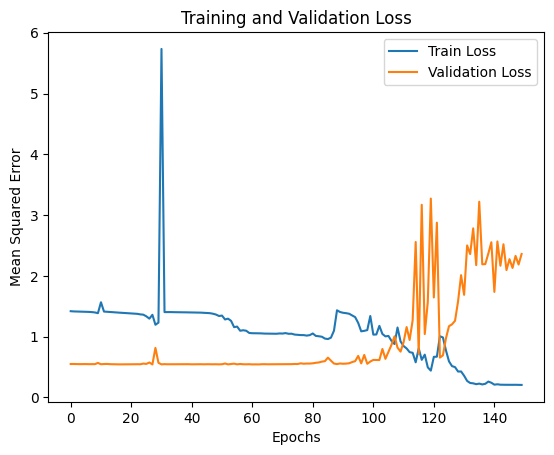

In [385]:
# # Plot training and validation loss
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Mean Squared Error')
# plt.legend()
# plt.title('Training and Validation Loss')
# plt.show()

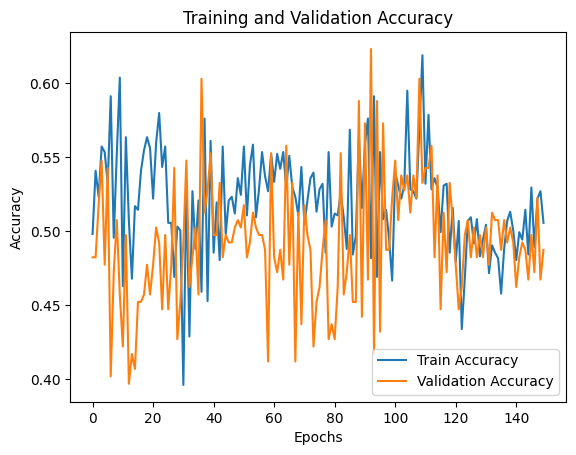

In [386]:
# # Plot training and validation accuracy 
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.title('Training and Validation Accuracy')
# plt.show()

In [387]:
# # Evaluate the model (optional)
# loss = model_ts.evaluate(X_test_seq_ts, y_test_seq_ts)
# print(f'Test loss: {loss}')

8/8 [==============================] - 0s 6ms/step - loss: 0.9143 - accuracy: 0.5248
Test loss: [0.9142591953277588, 0.5247933864593506]


In [388]:
# # Use the trained model to make predictions
# input_sequence = X_test_seq_ts[0].reshape(1, sequence_length, X_train_ts.shape[1])
# predicted_percentages = model_ts.predict(input_sequence)


1/1 [==============================] - 0s 263ms/step


In [389]:
# predicted_percentages

array([[-0.01832305, -0.01668985]], dtype=float32)

In [390]:
# X_test_seq_ts[0]

array([[-1.35289157, -0.17171971, -0.14136891],
       [ 0.43557262, -0.09357239, -0.22041086],
       [ 1.42804087, -0.08452515, -0.22956167],
       [-0.07554527,  0.22500789,  0.00162238],
       [-0.44347439, -0.16243755, -0.07576805],
       [-1.18037714, -0.19775192, -0.11148669],
       [-0.60404129, -0.17574325, -0.13729931],
       [-0.05859232,  0.80283685,  0.9005568 ],
       [ 0.58298411, -0.16169834, -0.151505  ],
       [-0.07826719,  0.09497912, -0.12989496]])

Epoch 1/50
25/25 [==============================] - 5s 40ms/step - loss: 1.3492 - val_loss: 0.7972
Epoch 2/50
25/25 [==============================] - 0s 12ms/step - loss: 1.3482 - val_loss: 0.7969
Epoch 3/50
25/25 [==============================] - 0s 16ms/step - loss: 1.3473 - val_loss: 0.7970
Epoch 4/50
25/25 [==============================] - 0s 12ms/step - loss: 1.3469 - val_loss: 0.7968
Epoch 5/50
25/25 [==============================] - 0s 12ms/step - loss: 1.3456 - val_loss: 0.7965
Epoch 6/50
25/25 [==============================] - 0s 12ms/step - loss: 1.3447 - val_loss: 0.7968
Epoch 7/50
25/25 [==============================] - 0s 12ms/step - loss: 1.3445 - val_loss: 0.7980
Epoch 8/50
25/25 [==============================] - 0s 13ms/step - loss: 1.3423 - val_loss: 0.7961
Epoch 9/50
25/25 [==============================] - 0s 12ms/step - loss: 1.3416 - val_loss: 0.7968
Epoch 10/50
25/25 [==============================] - 0s 12ms/step - loss: 1.3419 - val_loss: 0.7952
Epoch 11/

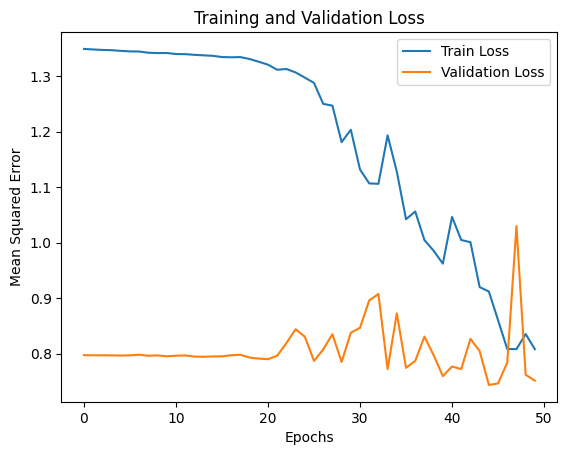

1/1 [==============================] - 1s 543ms/step


In [391]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# import matplotlib.pyplot as plt

# # Load your dataset
# data = df_new

# # Extract relevant columns
# returns = data['total_returns'].values
# stock_percentage = data['Stocks_per_returns'].values
# bond_percentage = data['Bonds_per_returns'].values

# # Combine the input features and target variables
# X_ts7 = np.column_stack((returns, stock_percentage, bond_percentage))
# y_ts7 = np.column_stack((stock_percentage, bond_percentage))

# # Normalize the data
# scaler = StandardScaler()
# X_ts7 = scaler.fit_transform(X_ts7)
# y_ts7 = scaler.fit_transform(y_ts7)

# # Split the dataset into training and testing sets
# X_train_ts7, X_test_ts7, y_train_ts7, y_test_ts7 = train_test_split(X_ts7, y_ts7, test_size=0.2, random_state=42)

# # Create time series sequences for 7 days
# def create_sequences(data, sequence_length):
#     X = []
#     y = []
#     for i in range(len(data) - sequence_length):
#         X.append(data[i:i+sequence_length])
#         y.append(data[i+1:i+sequence_length+1])  # Shifted by 1 for the next 7 days
#     return np.array(X), np.array(y)

# sequence_length = 7  # You want to predict the next 7 days
# X_train_seq_ts7, y_train_seq_ts7 = create_sequences(X_train_ts7, sequence_length)
# X_test_seq_ts7, y_test_seq_ts7 = create_sequences(X_test_ts7, sequence_length)

# # Ensure that y_train_seq has the shape (batch_size, 7, 2) for stock and bond percentages
# y_train_seq_ts7 = y_train_seq_ts7[:, :, 1:]  # Keep only the first two columns
# y_test_seq_ts7 = y_test_seq_ts7[:, :, 1:]

# X_train_seq_ts7, X_val_seq_ts7, y_train_seq_ts7, y_val_seq_ts7 = train_test_split(X_train_seq_ts7, y_train_seq_ts7, test_size=0.2, random_state=42)

# # X_train_seq_ts7 = X_train_seq_ts7.reshape(-1, sequence_length, X_train_seq_ts7.shape[2])
# # X_val_seq_ts7 = X_val_seq_ts7.reshape(-1, sequence_length, X_val_seq_ts7.shape[2])

# # Build the LSTM model
# model_ts7 = Sequential()
# model_ts7.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, X_train_seq_ts7.shape[2])))
# model_ts7.add(LSTM(units=50, activation='relu', return_sequences=True))
# model_ts7.add(Dense(2, activation='linear'))  # Output layer for stocks and bonds percentages

# # Compile the model
# model_ts7.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model and record training history
# history_ts7 = model_ts7.fit(X_train_seq_ts7, y_train_seq_ts7, epochs=50, batch_size=32, validation_data=(X_val_seq_ts7, y_val_seq_ts7))

# # Plot training and validation loss
# plt.plot(history_ts7.history['loss'], label='Train Loss')
# plt.plot(history_ts7.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Mean Squared Error')
# plt.legend()
# plt.title('Training and Validation Loss')
# plt.show()

# # Use the trained model to make predictions for the next 7 days
# input_sequence = X_test_seq_ts7[0].reshape(1, sequence_length, X_train_ts7.shape[1])
# predicted_percentages = model_ts7.predict(input_sequence)


In [392]:
# predicted_percentages

array([[[-0.12379728, -0.11752428],
        [-0.01008739,  0.0253874 ],
        [ 0.8321384 ,  0.85968876],
        [ 0.43706077,  0.7200143 ],
        [-0.01501985,  0.09336649],
        [-0.02516883,  0.05906957],
        [-0.0358556 ,  0.04779051]]], dtype=float32)

Epoch 1/75
25/25 [==============================] - 5s 36ms/step - loss: 1.3489 - accuracy: 0.5829 - val_loss: 0.7975 - val_accuracy: 0.5300
Epoch 2/75
25/25 [==============================] - 0s 12ms/step - loss: 1.3485 - accuracy: 0.4725 - val_loss: 0.7973 - val_accuracy: 0.5807
Epoch 3/75
25/25 [==============================] - 0s 15ms/step - loss: 1.3473 - accuracy: 0.5497 - val_loss: 0.7969 - val_accuracy: 0.5029
Epoch 4/75
25/25 [==============================] - 0s 12ms/step - loss: 1.3465 - accuracy: 0.5153 - val_loss: 0.7971 - val_accuracy: 0.5829
Epoch 5/75
25/25 [==============================] - 0s 12ms/step - loss: 1.3455 - accuracy: 0.5381 - val_loss: 0.7973 - val_accuracy: 0.5793
Epoch 6/75
25/25 [==============================] - 0s 13ms/step - loss: 1.3451 - accuracy: 0.5060 - val_loss: 0.7974 - val_accuracy: 0.5736
Epoch 7/75
25/25 [==============================] - 0s 14ms/step - loss: 1.3434 - accuracy: 0.5456 - val_loss: 0.7969 - val_accuracy: 0.5564
Epoch 8/75
25

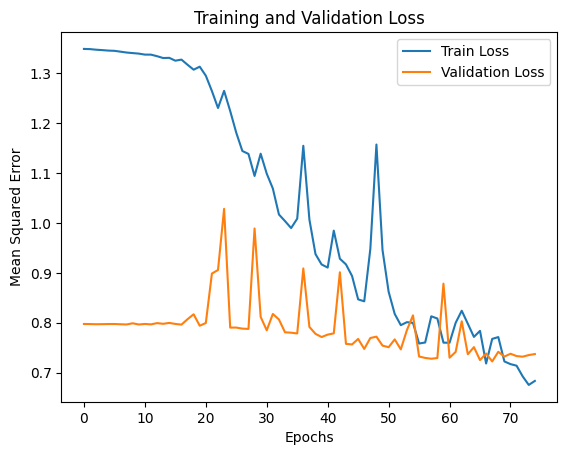

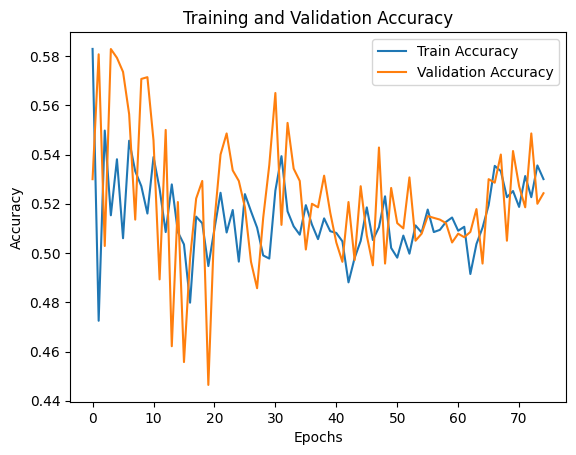

1/1 [==============================] - 0s 484ms/step


In [393]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# import matplotlib.pyplot as plt

# # Load your dataset
# data = df_new

# # Extract relevant columns
# returns = data['total_returns'].values
# stock_percentage = data['Stocks_per_returns'].values
# bond_percentage = data['Bonds_per_returns'].values

# # Combine the input features and target variables
# X_ts7 = np.column_stack((returns, stock_percentage, bond_percentage))
# y_ts7 = np.column_stack((stock_percentage, bond_percentage))

# # Normalize the data
# scaler = StandardScaler()
# X_ts7 = scaler.fit_transform(X_ts7)
# y_ts7 = scaler.fit_transform(y_ts7)

# # Split the dataset into training and testing sets
# X_train_ts7, X_test_ts7, y_train_ts7, y_test_ts7 = train_test_split(X_ts7, y_ts7, test_size=0.2, random_state=42)

# # Create time series sequences for 7 days
# def create_sequences(data, sequence_length):
#     X = []
#     y = []
#     for i in range(len(data) - sequence_length):
#         X.append(data[i:i+sequence_length])
#         y.append(data[i+1:i+sequence_length+1])  # Shifted by 1 for the next 7 days
#     return np.array(X), np.array(y)

# sequence_length = 7  # You want to predict the next 7 days
# X_train_seq_ts7, y_train_seq_ts7 = create_sequences(X_train_ts7, sequence_length)
# X_test_seq_ts7, y_test_seq_ts7 = create_sequences(X_test_ts7, sequence_length)

# # Ensure that y_train_seq has the shape (batch_size, 7, 2) for stock and bond percentages
# y_train_seq_ts7 = y_train_seq_ts7[:, :, 1:]  # Keep only the first two columns
# y_test_seq_ts7 = y_test_seq_ts7[:, :, 1:]

# X_train_seq_ts7, X_val_seq_ts7, y_train_seq_ts7, y_val_seq_ts7 = train_test_split(X_train_seq_ts7, y_train_seq_ts7, test_size=0.2, random_state=42)

# # X_train_seq_ts7 = X_train_seq_ts7.reshape(-1, sequence_length, X_train_seq_ts7.shape[2])
# # X_val_seq_ts7 = X_val_seq_ts7.reshape(-1, sequence_length, X_val_seq_ts7.shape[2])

# # Build the LSTM model
# model_ts7 = Sequential()
# model_ts7.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, X_train_seq_ts7.shape[2])))
# model_ts7.add(LSTM(units=50, activation='relu', return_sequences=True))
# model_ts7.add(Dense(2, activation='linear'))  # Output layer for stocks and bonds percentages

# # Compile the model
# model_ts7.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# # Train the model and record training history
# history_ts7 = model_ts7.fit(X_train_seq_ts7, y_train_seq_ts7, epochs=75, batch_size=32, validation_data=(X_val_seq_ts7, y_val_seq_ts7))

# # Plot training and validation loss
# plt.plot(history_ts7.history['loss'], label='Train Loss')
# plt.plot(history_ts7.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Mean Squared Error')
# plt.legend()
# plt.title('Training and Validation Loss')
# plt.show()

# # Plot training and validation loss
# plt.plot(history_ts7.history['accuracy'], label='Train Accuracy')
# plt.plot(history_ts7.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.title('Training and Validation Accuracy')
# plt.show()

# # Use the trained model to make predictions for the next 7 days
# input_sequence = X_test_seq_ts7[0].reshape(1, sequence_length, X_train_ts7.shape[1])
# predicted_percentages = model_ts7.predict(input_sequence)


In [394]:
# predicted_percentages

array([[[-0.13725588, -0.15659213],
        [ 0.15566364,  0.18154937],
        [ 0.08531015,  0.26223588],
        [-0.20455784, -0.17376626],
        [ 0.01560423,  0.02267297],
        [-0.12006891, -0.07646276],
        [-0.10096391, -0.06364662]]], dtype=float32)

In [395]:
# df_new.head()

,total_returns,Stocks_per_returns,Bonds_per_returns
Date,,,
2018-10-11,-0.049100,41.900097,58.099903
2018-10-12,0.016760,84.764013,15.235987
2018-10-15,0.001099,537.215052,637.215052
2018-10-16,0.019282,111.477561,11.477561
2018-10-17,0.007035,3.591482,103.591482


In [396]:
# def pred_allocations():
#     n = int(input('Which day starting from today as 0th day you would like the prediction for:'))
#     while n>6:
#         print('Please enter value less than equal to 6')
#         n = int(input('Which day starting from today as 0th day you would like the prediction for:'))
#     input_sequence = X_test_seq_ts7[-1].reshape(1, sequence_length, X_train_ts7.shape[1])
#     predicted_percentages = model_ts7.predict(input_sequence)
#     print(f'Percentage of Stocks Allocation = {abs(predicted_percentages[0][n][0])*100}\nPercentage of Bonds Allocation = {abs(predicted_percentages[0][n][1])*100}')

In [397]:
# pred_allocations()

Which day starting from today as 0th day you would like the prediction for: 6


1/1 [==============================] - 0s 22ms/step
Percentage of Stocks Allocation = 5.304672196507454
Percentage of Bonds Allocation = 10.445000231266022


In [398]:
# pred_allocations()

Which day starting from today as 0th day you would like the prediction for: 5


1/1 [==============================] - 0s 32ms/step
Percentage of Stocks Allocation = 9.174501895904541
Percentage of Bonds Allocation = 10.233362019062042


In [55]:
filtered_df = df_new[df_new.index > '2022-01-01']

In [57]:
filtered_df.head()

,total_returns,Stocks_per_returns,Bonds_per_returns
Date,,,
2022-01-03,0.083094,7.670924,92.329076
2022-01-04,0.023940,2.629958,102.629958
2022-01-05,0.002790,695.197375,795.197375
2022-01-06,0.015459,6.234551,106.234551
2022-01-07,0.017877,22.655932,122.655932


In [58]:
filtered_df.shape

(444, 3)

Epoch 1/75
9/9 [==============================] - 5s 95ms/step - loss: 1.2405 - accuracy: 0.4481 - val_loss: 1.3479 - val_accuracy: 0.4163
Epoch 2/75
9/9 [==============================] - 0s 16ms/step - loss: 1.2397 - accuracy: 0.3967 - val_loss: 1.3465 - val_accuracy: 0.4327
Epoch 3/75
9/9 [==============================] - 0s 15ms/step - loss: 1.2392 - accuracy: 0.4394 - val_loss: 1.3458 - val_accuracy: 0.4959
Epoch 4/75
9/9 [==============================] - 0s 19ms/step - loss: 1.2390 - accuracy: 0.5026 - val_loss: 1.3452 - val_accuracy: 0.4959
Epoch 5/75
9/9 [==============================] - 0s 18ms/step - loss: 1.2388 - accuracy: 0.4455 - val_loss: 1.3448 - val_accuracy: 0.4510
Epoch 6/75
9/9 [==============================] - 0s 17ms/step - loss: 1.2387 - accuracy: 0.4625 - val_loss: 1.3447 - val_accuracy: 0.5082
Epoch 7/75
9/9 [==============================] - 0s 16ms/step - loss: 1.2386 - accuracy: 0.4872 - val_loss: 1.3445 - val_accuracy: 0.5082
Epoch 8/75
9/9 [===========

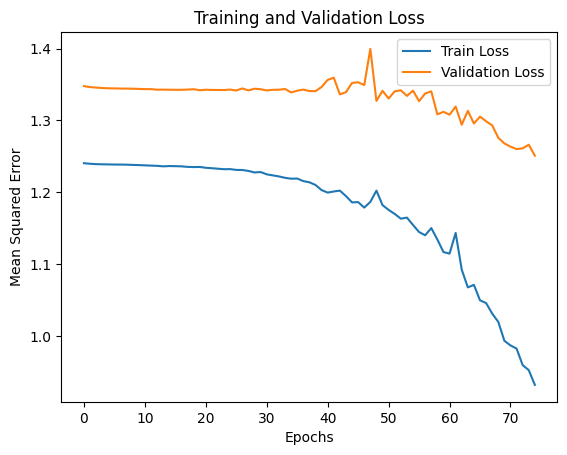

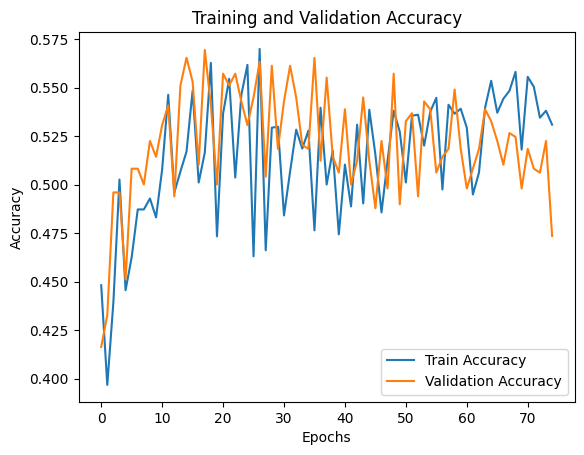

1/1 [==============================] - 0s 467ms/step


In [405]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your dataset
data = filtered_df

# Extract relevant columns
returns = data['total_returns'].values
stock_percentage = data['Stocks_per_returns'].values
bond_percentage = data['Bonds_per_returns'].values

# Combine the input features and target variables
X_ts7 = np.column_stack((returns, stock_percentage, bond_percentage))
y_ts7 = np.column_stack((stock_percentage, bond_percentage))

# Normalize the data
scaler = StandardScaler()
X_ts7 = scaler.fit_transform(X_ts7)
y_ts7 = scaler.fit_transform(y_ts7)

# Split the dataset into training and testing sets
X_train_ts7, X_test_ts7, y_train_ts7, y_test_ts7 = train_test_split(X_ts7, y_ts7, test_size=0.2, random_state=42)

# Create time series sequences for 7 days
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+1:i+sequence_length+1])  # Shifted by 1 for the next 7 days
    return np.array(X), np.array(y)

sequence_length = 7  # You want to predict the next 7 days
X_train_seq_ts7, y_train_seq_ts7 = create_sequences(X_train_ts7, sequence_length)
X_test_seq_ts7, y_test_seq_ts7 = create_sequences(X_test_ts7, sequence_length)

# Ensure that y_train_seq has the shape (batch_size, 7, 2) for stock and bond percentages
y_train_seq_ts7 = y_train_seq_ts7[:, :, 1:]  # Keep only the first two columns
y_test_seq_ts7 = y_test_seq_ts7[:, :, 1:]

X_train_seq_ts7, X_val_seq_ts7, y_train_seq_ts7, y_val_seq_ts7 = train_test_split(X_train_seq_ts7, y_train_seq_ts7, test_size=0.2, random_state=42)

# X_train_seq_ts7 = X_train_seq_ts7.reshape(-1, sequence_length, X_train_seq_ts7.shape[2])
# X_val_seq_ts7 = X_val_seq_ts7.reshape(-1, sequence_length, X_val_seq_ts7.shape[2])

# Build the LSTM model
model_ts7 = Sequential()
model_ts7.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, X_train_seq_ts7.shape[2])))
model_ts7.add(LSTM(units=50, activation='relu', return_sequences=True))
model_ts7.add(Dense(2, activation='linear'))  # Output layer for stocks and bonds percentages

# Compile the model
model_ts7.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model and record training history
history_ts7 = model_ts7.fit(X_train_seq_ts7, y_train_seq_ts7, epochs=75, batch_size=32, validation_data=(X_val_seq_ts7, y_val_seq_ts7))

# Plot training and validation loss
plt.plot(history_ts7.history['loss'], label='Train Loss')
plt.plot(history_ts7.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation loss
plt.plot(history_ts7.history['accuracy'], label='Train Accuracy')
plt.plot(history_ts7.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Use the trained model to make predictions for the next 7 days
input_sequence = X_test_seq_ts7[0].reshape(1, sequence_length, X_train_ts7.shape[1])
predicted_percentages = model_ts7.predict(input_sequence)


In [406]:
def pred_allocations():
    n = int(input('Which day starting from today as 0th day you would like the prediction for:'))
    while n>6:
        print('Please enter value less than equal to 6')
        n = int(input('Which day starting from today as 0th day you would like the prediction for:'))
    input_sequence = X_test_seq_ts7[-1].reshape(1, sequence_length, X_train_ts7.shape[1])
    predicted_percentages = model_ts7.predict(input_sequence)
    print(f'Percentage of Stocks Allocation = {abs(predicted_percentages[0][n][0])*100}\nPercentage of Bonds Allocation = {abs(predicted_percentages[0][n][1])*100}')

In [407]:
pred_allocations()

Which day starting from today as 0th day you would like the prediction for: 6


1/1 [==============================] - 0s 32ms/step
Percentage of Stocks Allocation = 48.282283544540405
Percentage of Bonds Allocation = 58.93317461013794


In [408]:
pred_allocations()

Which day starting from today as 0th day you would like the prediction for: 5


1/1 [==============================] - 0s 31ms/step
Percentage of Stocks Allocation = 127.25348472595215
Percentage of Bonds Allocation = 134.9751353263855


In [409]:
pred_allocations()

Which day starting from today as 0th day you would like the prediction for: 4


1/1 [==============================] - 0s 40ms/step
Percentage of Stocks Allocation = 48.3978271484375
Percentage of Bonds Allocation = 51.48252248764038


In [59]:
filtered_df.head()

,total_returns,Stocks_per_returns,Bonds_per_returns
Date,,,
2022-01-03,0.083094,7.670924,92.329076
2022-01-04,0.023940,2.629958,102.629958
2022-01-05,0.002790,695.197375,795.197375
2022-01-06,0.015459,6.234551,106.234551
2022-01-07,0.017877,22.655932,122.655932


In [61]:
dollars[dollars['Date']=='13/01/2022']

,Date,Returns,Asset
8,13/01/2022,0.002887,Cash


In [64]:
dollars.head()

,Date,Returns,Asset
0,03/01/2022,0.000531,Cash
1,04/01/2022,0.000531,Cash
2,05/01/2022,0.003453,Cash
3,06/01/2022,-0.002470,Cash
4,07/01/2022,0.004510,Cash


In [69]:
d_new = dollars.rename(columns={'Returns': 'Returns_d', 'Asset': 'Asset_d'})
d_new['Date'] = pd.to_datetime(d_new['Date'], format="%d/%m/%Y")
d_new = d_new.set_index('Date')
d_new.head()

,Returns_d,Asset_d
Date,,
2022-01-03,0.000531,Cash
2022-01-04,0.000531,Cash
2022-01-05,0.003453,Cash
2022-01-06,-0.002470,Cash
2022-01-07,0.004510,Cash


In [71]:
concat_df = pd.concat([filtered_df,d_new], axis=1)
concat_df.head()

,total_returns,Stocks_per_returns,Bonds_per_returns,Returns_d,Asset_d
Date,,,,,
2022-01-03,0.083094,7.670924,92.329076,0.000531,Cash
2022-01-04,0.023940,2.629958,102.629958,0.000531,Cash
2022-01-05,0.002790,695.197375,795.197375,0.003453,Cash
2022-01-06,0.015459,6.234551,106.234551,-0.002470,Cash
2022-01-07,0.017877,22.655932,122.655932,0.004510,Cash


In [72]:
concat_df.isna().sum()

total_returns         17
Stocks_per_returns    17
Bonds_per_returns     17
Returns_d              1
Asset_d                1
dtype: int64

In [73]:
concat_df.tail(20)

,total_returns,Stocks_per_returns,Bonds_per_returns,Returns_d,Asset_d
Date,,,,,
2023-09-12,-0.011293,50.437582,49.562418,-0.001675,Cash
2023-09-13,-0.002276,54.549428,154.549428,0.001026,Cash
2023-09-14,0.017609,47.873990,52.126010,-0.007171,Cash
2023-09-15,-0.004231,287.425466,187.425466,0.001220,Cash
2023-09-18,0.000027,2661.127311,2561.127311,0.002061,Cash
2023-09-19,0.008500,25.307185,125.307185,-0.001029,Cash
2023-09-20,-0.013060,71.934160,28.065840,0.002902,Cash
2023-09-21,0.013721,119.532122,219.532122,-0.004760,Cash
2023-09-22,-0.011671,19.669998,80.330002,-0.000375,Cash


In [75]:
concat_df[concat_df['total_returns'].isna()]

,total_returns,Stocks_per_returns,Bonds_per_returns,Returns_d,Asset_d
Date,,,,,
2022-01-17,NaN,NaN,NaN,-0.004361,Cash
2022-02-21,NaN,NaN,NaN,-0.003256,Cash
2022-04-15,NaN,NaN,NaN,0.001482,Cash
2022-05-30,NaN,NaN,NaN,-0.001492,Cash
2022-06-20,NaN,NaN,NaN,-0.005508,Cash
2022-07-04,NaN,NaN,NaN,-0.005731,Cash
2022-09-05,NaN,NaN,NaN,0.008040,Cash
2022-11-24,NaN,NaN,NaN,0.008564,Cash
2022-12-26,NaN,NaN,NaN,0.003117,Cash


In [76]:
concat_df = concat_df.ffill()
concat_df.isna().sum()

total_returns         0
Stocks_per_returns    0
Bonds_per_returns     0
Returns_d             0
Asset_d               0
dtype: int64

In [77]:
concat_df['total_returns'] = concat_df['total_returns'] + concat_df['Returns_d']
concat_df['Dollars_per_returns'] = concat_df['Returns_d']*100/concat_df['total_returns']
concat_df.head()

,total_returns,Stocks_per_returns,Bonds_per_returns,Returns_d,Asset_d,Dollars_per_returns
Date,,,,,,
2022-01-03,0.083625,7.670924,92.329076,0.000531,Cash,0.635508
2022-01-04,0.024472,2.629958,102.629958,0.000531,Cash,2.171657
2022-01-05,0.006242,695.197375,795.197375,0.003453,Cash,55.310866
2022-01-06,0.012988,6.234551,106.234551,-0.002470,Cash,-19.018860
2022-01-07,0.022388,22.655932,122.655932,0.004510,Cash,20.147270


In [78]:
final_df = concat_df[['total_returns', 'Stocks_per_returns', 'Bonds_per_returns', 'Dollars_per_returns']]
final_df.head()

,total_returns,Stocks_per_returns,Bonds_per_returns,Dollars_per_returns
Date,,,,
2022-01-03,0.083625,7.670924,92.329076,0.635508
2022-01-04,0.024472,2.629958,102.629958,2.171657
2022-01-05,0.006242,695.197375,795.197375,55.310866
2022-01-06,0.012988,6.234551,106.234551,-19.018860
2022-01-07,0.022388,22.655932,122.655932,20.147270


Epoch 1/75
9/9 [==============================] - 4s 102ms/step - loss: 1.1105 - accuracy: 0.5575 - val_loss: 0.8510 - val_accuracy: 0.7378
Epoch 2/75
9/9 [==============================] - 0s 17ms/step - loss: 1.1094 - accuracy: 0.7073 - val_loss: 0.8505 - val_accuracy: 0.7260
Epoch 3/75
9/9 [==============================] - 0s 19ms/step - loss: 1.1089 - accuracy: 0.4826 - val_loss: 0.8503 - val_accuracy: 0.3268
Epoch 4/75
9/9 [==============================] - 0s 14ms/step - loss: 1.1084 - accuracy: 0.3705 - val_loss: 0.8500 - val_accuracy: 0.2935
Epoch 5/75
9/9 [==============================] - 0s 19ms/step - loss: 1.1079 - accuracy: 0.3715 - val_loss: 0.8497 - val_accuracy: 0.3483
Epoch 6/75
9/9 [==============================] - 0s 20ms/step - loss: 1.1074 - accuracy: 0.3686 - val_loss: 0.8495 - val_accuracy: 0.2955
Epoch 7/75
9/9 [==============================] - 0s 22ms/step - loss: 1.1070 - accuracy: 0.2996 - val_loss: 0.8492 - val_accuracy: 0.2720
Epoch 8/75
9/9 [==========

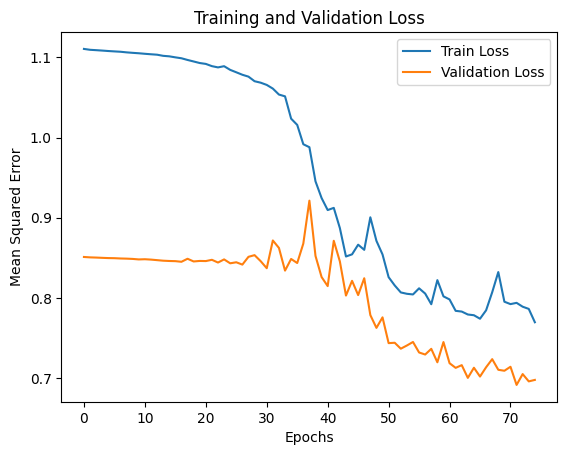

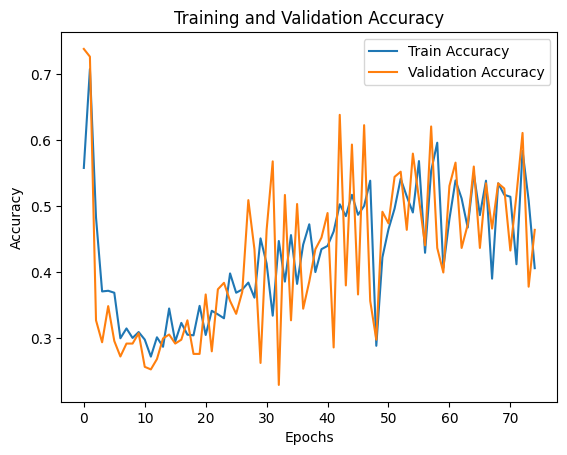

1/1 [==============================] - 1s 600ms/step


In [79]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your dataset
data = final_df

# Extract relevant columns
returns = data['total_returns'].values
stock_percentage = data['Stocks_per_returns'].values
bond_percentage = data['Bonds_per_returns'].values
dollar_percentage = data['Dollars_per_returns'].values

# Combine the input features and target variables
X_ts7 = np.column_stack((returns, stock_percentage, bond_percentage, dollar_percentage))
y_ts7 = np.column_stack((stock_percentage, bond_percentage, dollar_percentage))

# Normalize the data
scaler = StandardScaler()
X_ts7 = scaler.fit_transform(X_ts7)
y_ts7 = scaler.fit_transform(y_ts7)

# Split the dataset into training and testing sets
X_train_ts7, X_test_ts7, y_train_ts7, y_test_ts7 = train_test_split(X_ts7, y_ts7, test_size=0.2, random_state=42)

# Create time series sequences for 7 days
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+1:i+sequence_length+1])  # Shifted by 1 for the next 7 days
    return np.array(X), np.array(y)

sequence_length = 7  # You want to predict the next 7 days
X_train_seq_ts7, y_train_seq_ts7 = create_sequences(X_train_ts7, sequence_length)
X_test_seq_ts7, y_test_seq_ts7 = create_sequences(X_test_ts7, sequence_length)

# Ensure that y_train_seq has the shape (batch_size, 7, 2) for stock and bond percentages
y_train_seq_ts7 = y_train_seq_ts7[:, :, 1:]  # Keep only the first two columns
y_test_seq_ts7 = y_test_seq_ts7[:, :, 1:]

X_train_seq_ts7, X_val_seq_ts7, y_train_seq_ts7, y_val_seq_ts7 = train_test_split(X_train_seq_ts7, y_train_seq_ts7, test_size=0.2, random_state=42)

# X_train_seq_ts7 = X_train_seq_ts7.reshape(-1, sequence_length, X_train_seq_ts7.shape[2])
# X_val_seq_ts7 = X_val_seq_ts7.reshape(-1, sequence_length, X_val_seq_ts7.shape[2])

# Build the LSTM model
model_ts7 = Sequential()
model_ts7.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, X_train_seq_ts7.shape[2])))
model_ts7.add(LSTM(units=50, activation='relu', return_sequences=True))
model_ts7.add(Dense(3, activation='linear'))  # Output layer for stocks and bonds percentages

# Compile the model
model_ts7.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model and record training history
history_ts7 = model_ts7.fit(X_train_seq_ts7, y_train_seq_ts7, epochs=75, batch_size=32, validation_data=(X_val_seq_ts7, y_val_seq_ts7))

# Plot training and validation loss
plt.plot(history_ts7.history['loss'], label='Train Loss')
plt.plot(history_ts7.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation loss
plt.plot(history_ts7.history['accuracy'], label='Train Accuracy')
plt.plot(history_ts7.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Use the trained model to make predictions for the next 7 days
input_sequence = X_test_seq_ts7[0].reshape(1, sequence_length, X_train_ts7.shape[1])
predicted_percentages = model_ts7.predict(input_sequence)


In [3]:
def merge_dfs(df1, df2, df3):
    asset1 = df1['Asset'].unique()[0]
    asset2 = df2['Asset'].unique()[0]
    asset3 = df3['Asset'].unique()[0]
    new_col1 = asset1+'_per_returns'
    new_col2 = asset2+'_per_returns'
    new_col3 = asset3+'_per_returns'
    df1_new = df1.rename(columns={'Returns': 'Returns_'+asset1, 'Asset': 'Asset_'+asset1})
    df2_new = df2.rename(columns={'Returns': 'Returns_'+asset2, 'Asset': 'Asset_'+asset2})
    df3_new = df3.rename(columns={'Returns': 'Returns_'+asset3, 'Asset': 'Asset_'+asset3})
    df1_new = df1_new.set_index('Date')
    df2_new = df2_new.set_index('Date')
    df3_new = df3_new.set_index('Date')
    # d_new.head()
    concat_df = pd.concat([df1_new,df2_new, df3_new], axis=1)
    concat_df = concat_df.ffill()
    concat_df = concat_df.bfill()
    concat_df['total_returns'] = concat_df['Returns_'+asset1] + concat_df['Returns_'+asset2] + concat_df['Returns_'+asset3]
    concat_df[new_col1] = concat_df['Returns_'+asset1]*100/concat_df['total_returns']
    concat_df[new_col2] = concat_df['Returns_'+asset2]*100/concat_df['total_returns']
    concat_df[new_col3] = concat_df['Returns_'+asset3]*100/concat_df['total_returns']
    return concat_df


In [84]:
dollars.head()

,Date,Returns,Asset
0,03/01/2022,0.000531,Cash
1,04/01/2022,0.000531,Cash
2,05/01/2022,0.003453,Cash
3,06/01/2022,-0.002470,Cash
4,07/01/2022,0.004510,Cash


In [93]:
dff = merge_dfs(filtered_df, dollars)
dff.head()

,total_returns,Stocks_per_returns,Bonds_per_returns,Returns_new,Asset_new,Cash_per_returns
Date,,,,,,
2022-01-03,0.083625,7.670924,92.329076,0.000531,Cash,0.635508
2022-01-04,0.024472,2.629958,102.629958,0.000531,Cash,2.171657
2022-01-05,0.006242,695.197375,795.197375,0.003453,Cash,55.310866
2022-01-06,0.012988,6.234551,106.234551,-0.002470,Cash,-19.018860
2022-01-07,0.022388,22.655932,122.655932,0.004510,Cash,20.147270


In [20]:
def merge_dfs(df1, df2, df3):
    asset1 = df1['Asset'].unique()[0]
    asset2 = df2['Asset'].unique()[0]
    asset3 = df3['Asset'].unique()[0]
    new_col1 = asset1+'_per_returns'
    new_col2 = asset2+'_per_returns'
    new_col3 = asset3+'_per_returns'
    df1_new = df1.rename(columns={'Returns': 'Returns_'+asset1, 'Asset': 'Asset_'+asset1})
    df2_new = df2.rename(columns={'Returns': 'Returns_'+asset2, 'Asset': 'Asset_'+asset2})
    df3_new = df3.rename(columns={'Returns': 'Returns_'+asset3, 'Asset': 'Asset_'+asset3})
    df1_new = df1_new.set_index('Date')
    df2_new = df2_new.set_index('Date')
    df3_new = df3_new.set_index('Date')
    # d_new.head()
    concat_df = pd.concat([df1_new,df2_new, df3_new], axis=1)
    concat_df = concat_df.ffill()
    concat_df = concat_df.bfill()
    concat_df['total_returns'] = concat_df['Returns_'+asset1] + concat_df['Returns_'+asset2] + concat_df['Returns_'+asset3]
    concat_df[new_col1] = concat_df['Returns_'+asset1]*100/concat_df['total_returns']
    concat_df[new_col2] = concat_df['Returns_'+asset2]*100/concat_df['total_returns']
    concat_df[new_col3] = concat_df['Returns_'+asset3]*100/concat_df['total_returns']
    return concat_df


In [4]:
stocks['Asset'] = 'Stocks'

In [5]:
stocks.head()

,Date,Returns,Asset
0,2018-10-11,-0.020573,Stocks
1,2018-10-12,0.014206,Stocks
2,2018-10-15,-0.005905,Stocks
3,2018-10-16,0.021496,Stocks
4,2018-10-17,-0.000253,Stocks


In [6]:
bonds['Asset'] = 'Bonds'
bonds.head()

,Date,Close,Returns,Asset
0,2018-10-10,3.225,NaN,Bonds
1,2018-10-11,3.133,-0.028527,Bonds
2,2018-10-12,3.141,0.002554,Bonds
3,2018-10-15,3.163,0.007004,Bonds
4,2018-10-16,3.156,-0.002213,Bonds


In [7]:
dollars['Asset'] = 'Cash'
dollars.head()

,Date,Returns,Asset
0,03/01/2022,NaN,Cash
1,04/01/2022,0.000531,Cash
2,05/01/2022,0.003453,Cash
3,06/01/2022,-0.002470,Cash
4,07/01/2022,0.004510,Cash


In [8]:
stocks.isna().sum()

Date       0
Returns    0
Asset      0
dtype: int64

In [9]:
bonds.isna().sum()

Date       0
Close      0
Returns    1
Asset      0
dtype: int64

In [10]:
bonds = bonds.bfill()

In [11]:
bonds.isna().sum()

Date       0
Close      0
Returns    0
Asset      0
dtype: int64

In [12]:
dollars = dollars.bfill()

In [13]:
dollars.isna().sum()

Date       0
Returns    0
Asset      0
dtype: int64

In [14]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
bonds['Date'] = pd.to_datetime(bonds['Date'])

In [15]:
dollars['Date'] = pd.to_datetime(dollars['Date'], format="%d/%m/%Y")

In [16]:
dollars.isna().sum()

Date       0
Returns    0
Asset      0
dtype: int64

In [17]:
bonds.isna().sum()

Date       0
Close      0
Returns    0
Asset      0
dtype: int64

In [18]:
stocks.isna().sum()

Date       0
Returns    0
Asset      0
dtype: int64

In [21]:
merged_df = merge_dfs(stocks, bonds, dollars)
merged_df.head()

,Returns_Stocks,Asset_Stocks,Close,Returns_Bonds,Asset_Bonds,Returns_Cash,Asset_Cash,total_returns,Stocks_per_returns,Bonds_per_returns,Cash_per_returns
Date,,,,,,,,,,,
2018-10-10,-0.020573,Stocks,3.225,-0.028527,Bonds,0.000531,Cash,-0.048569,42.358573,58.735638,-1.094211
2018-10-11,-0.020573,Stocks,3.133,-0.028527,Bonds,0.000531,Cash,-0.048569,42.358573,58.735638,-1.094211
2018-10-12,0.014206,Stocks,3.141,0.002554,Bonds,0.000531,Cash,0.017291,82.158788,14.767709,3.073503
2018-10-15,-0.005905,Stocks,3.163,0.007004,Bonds,0.000531,Cash,0.001631,-362.129249,429.537869,32.591381
2018-10-16,0.021496,Stocks,3.156,-0.002213,Bonds,0.000531,Cash,0.019814,108.487533,-11.169712,2.682179


Epoch 1/75
26/26 [==============================] - 5s 39ms/step - loss: 1.3795 - accuracy: 0.1639 - val_loss: 0.6419 - val_accuracy: 0.2104
Epoch 2/75
26/26 [==============================] - 0s 15ms/step - loss: 1.3775 - accuracy: 0.1881 - val_loss: 0.6415 - val_accuracy: 0.2083
Epoch 3/75
26/26 [==============================] - 0s 12ms/step - loss: 1.3765 - accuracy: 0.1895 - val_loss: 0.6408 - val_accuracy: 0.2463
Epoch 4/75
26/26 [==============================] - 0s 14ms/step - loss: 1.3758 - accuracy: 0.2951 - val_loss: 0.6413 - val_accuracy: 0.1787
Epoch 5/75
26/26 [==============================] - 0s 13ms/step - loss: 1.3744 - accuracy: 0.1914 - val_loss: 0.6396 - val_accuracy: 0.2752
Epoch 6/75
26/26 [==============================] - 0s 12ms/step - loss: 1.3730 - accuracy: 0.2760 - val_loss: 0.6390 - val_accuracy: 0.2470
Epoch 7/75
26/26 [==============================] - 0s 11ms/step - loss: 1.3714 - accuracy: 0.2532 - val_loss: 0.6376 - val_accuracy: 0.3146
Epoch 8/75
26

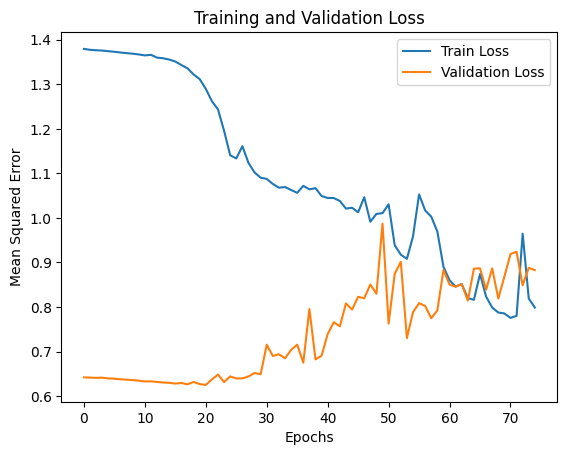

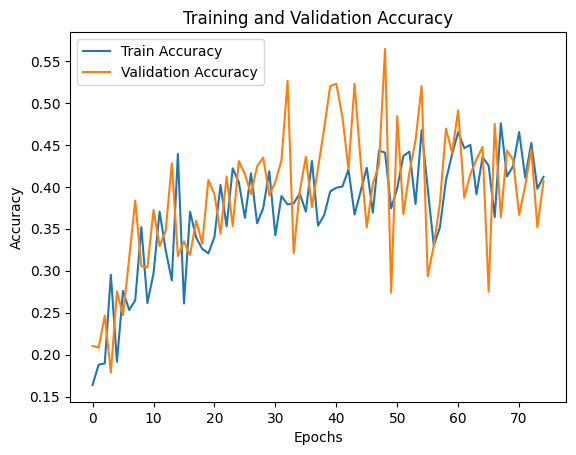

1/1 [==============================] - 1s 591ms/step


In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your dataset
data = merged_df

# Extract relevant columns
returns = data['total_returns'].values
stock_percentage = data['Stocks_per_returns'].values
bond_percentage = data['Bonds_per_returns'].values
dollar_percentage = data['Cash_per_returns'].values

# Combine the input features and target variables
X_ts7 = np.column_stack((returns, stock_percentage, bond_percentage, dollar_percentage))
y_ts7 = np.column_stack((stock_percentage, bond_percentage, dollar_percentage))

# Normalize the data
scaler = StandardScaler()
X_ts7 = scaler.fit_transform(X_ts7)
y_ts7 = scaler.fit_transform(y_ts7)

# Split the dataset into training and testing sets
X_train_ts7, X_test_ts7, y_train_ts7, y_test_ts7 = train_test_split(X_ts7, y_ts7, test_size=0.2, random_state=42)

# Create time series sequences for 7 days
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+1:i+sequence_length+1])  # Shifted by 1 for the next 7 days
    return np.array(X), np.array(y)

sequence_length = 7  # You want to predict the next 7 days
X_train_seq_ts7, y_train_seq_ts7 = create_sequences(X_train_ts7, sequence_length)
X_test_seq_ts7, y_test_seq_ts7 = create_sequences(X_test_ts7, sequence_length)

# Ensure that y_train_seq has the shape (batch_size, 7, 2) for stock and bond percentages
y_train_seq_ts7 = y_train_seq_ts7[:, :, 1:]  # Keep only the first two columns
y_test_seq_ts7 = y_test_seq_ts7[:, :, 1:]

X_train_seq_ts7, X_val_seq_ts7, y_train_seq_ts7, y_val_seq_ts7 = train_test_split(X_train_seq_ts7, y_train_seq_ts7, test_size=0.2, random_state=42)

# X_train_seq_ts7 = X_train_seq_ts7.reshape(-1, sequence_length, X_train_seq_ts7.shape[2])
# X_val_seq_ts7 = X_val_seq_ts7.reshape(-1, sequence_length, X_val_seq_ts7.shape[2])

# Build the LSTM model
model_ts7 = Sequential()
model_ts7.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, X_train_seq_ts7.shape[2])))
model_ts7.add(LSTM(units=50, activation='relu', return_sequences=True))
model_ts7.add(Dense(3, activation='linear'))  # Output layer for stocks and bonds percentages

# Compile the model
model_ts7.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model and record training history
history_ts7 = model_ts7.fit(X_train_seq_ts7, y_train_seq_ts7, epochs=75, batch_size=32, validation_data=(X_val_seq_ts7, y_val_seq_ts7))

# Plot training and validation loss
plt.plot(history_ts7.history['loss'], label='Train Loss')
plt.plot(history_ts7.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation loss
plt.plot(history_ts7.history['accuracy'], label='Train Accuracy')
plt.plot(history_ts7.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Use the trained model to make predictions for the next 7 days
input_sequence = X_test_seq_ts7[0].reshape(1, sequence_length, X_train_ts7.shape[1])
predicted_percentages = model_ts7.predict(input_sequence)


Epoch 1/100
13/13 [==============================] - 5s 70ms/step - loss: 1.3800 - accuracy: 0.3574 - val_loss: 0.6428 - val_accuracy: 0.1520
Epoch 2/100
13/13 [==============================] - 0s 25ms/step - loss: 1.3789 - accuracy: 0.1603 - val_loss: 0.6425 - val_accuracy: 0.1992
Epoch 3/100
13/13 [==============================] - 0s 24ms/step - loss: 1.3781 - accuracy: 0.1867 - val_loss: 0.6423 - val_accuracy: 0.2006
Epoch 4/100
13/13 [==============================] - 0s 19ms/step - loss: 1.3772 - accuracy: 0.1821 - val_loss: 0.6421 - val_accuracy: 0.2034
Epoch 5/100
13/13 [==============================] - 0s 17ms/step - loss: 1.3765 - accuracy: 0.1833 - val_loss: 0.6418 - val_accuracy: 0.2238
Epoch 6/100
13/13 [==============================] - 0s 18ms/step - loss: 1.3756 - accuracy: 0.2075 - val_loss: 0.6417 - val_accuracy: 0.2329
Epoch 7/100
13/13 [==============================] - 0s 18ms/step - loss: 1.3753 - accuracy: 0.2080 - val_loss: 0.6407 - val_accuracy: 0.2808
Epoch 

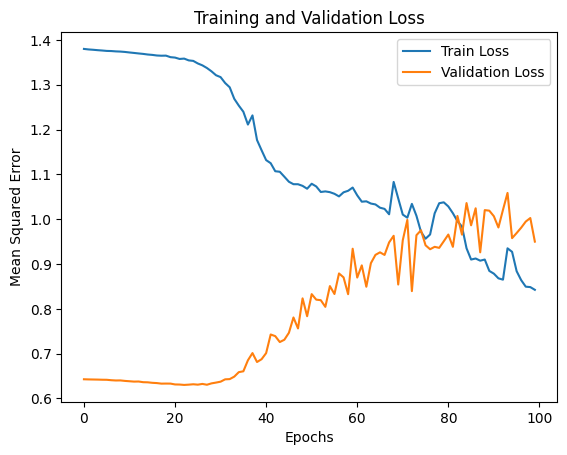

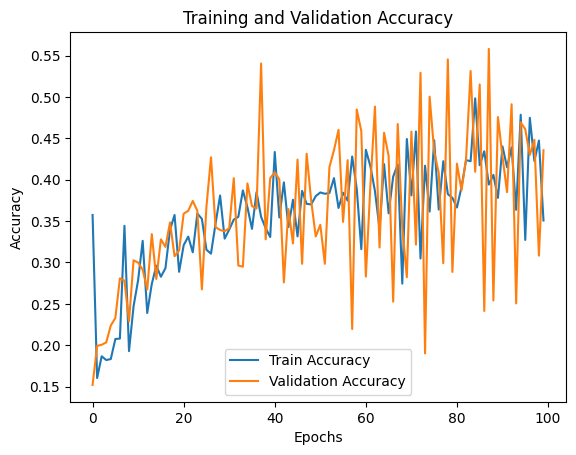

1/1 [==============================] - 0s 484ms/step


In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your dataset
data = merged_df

# Extract relevant columns
returns = data['total_returns'].values
stock_percentage = data['Stocks_per_returns'].values
bond_percentage = data['Bonds_per_returns'].values
dollar_percentage = data['Cash_per_returns'].values

# Combine the input features and target variables
X_ts7 = np.column_stack((returns, stock_percentage, bond_percentage, dollar_percentage))
y_ts7 = np.column_stack((stock_percentage, bond_percentage, dollar_percentage))

# Normalize the data
scaler = StandardScaler()
X_ts7 = scaler.fit_transform(X_ts7)
y_ts7 = scaler.fit_transform(y_ts7)

# Split the dataset into training and testing sets
X_train_ts7, X_test_ts7, y_train_ts7, y_test_ts7 = train_test_split(X_ts7, y_ts7, test_size=0.2, random_state=42)

# Create time series sequences for 7 days
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+1:i+sequence_length+1])  # Shifted by 1 for the next 7 days
    return np.array(X), np.array(y)

sequence_length = 7  # You want to predict the next 7 days
X_train_seq_ts7, y_train_seq_ts7 = create_sequences(X_train_ts7, sequence_length)
X_test_seq_ts7, y_test_seq_ts7 = create_sequences(X_test_ts7, sequence_length)

# Ensure that y_train_seq has the shape (batch_size, 7, 2) for stock and bond percentages
y_train_seq_ts7 = y_train_seq_ts7[:, :, 1:]  # Keep only the first two columns
y_test_seq_ts7 = y_test_seq_ts7[:, :, 1:]

X_train_seq_ts7, X_val_seq_ts7, y_train_seq_ts7, y_val_seq_ts7 = train_test_split(X_train_seq_ts7, y_train_seq_ts7, test_size=0.2, random_state=42)

# X_train_seq_ts7 = X_train_seq_ts7.reshape(-1, sequence_length, X_train_seq_ts7.shape[2])
# X_val_seq_ts7 = X_val_seq_ts7.reshape(-1, sequence_length, X_val_seq_ts7.shape[2])

# Build the LSTM model
model_ts7 = Sequential()
model_ts7.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, X_train_seq_ts7.shape[2])))
model_ts7.add(LSTM(units=50, activation='relu', return_sequences=True))
model_ts7.add(Dense(3, activation='linear'))  # Output layer for stocks and bonds percentages

# Compile the model
model_ts7.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model and record training history
history_ts7 = model_ts7.fit(X_train_seq_ts7, y_train_seq_ts7, epochs=100, batch_size=64, validation_data=(X_val_seq_ts7, y_val_seq_ts7))

# Plot training and validation loss
plt.plot(history_ts7.history['loss'], label='Train Loss')
plt.plot(history_ts7.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation loss
plt.plot(history_ts7.history['accuracy'], label='Train Accuracy')
plt.plot(history_ts7.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Use the trained model to make predictions for the next 7 days
input_sequence = X_test_seq_ts7[0].reshape(1, sequence_length, X_train_ts7.shape[1])
predicted_percentages = model_ts7.predict(input_sequence)


Epoch 1/200
26/26 [==============================] - 7s 50ms/step - loss: 1.3805 - accuracy: 0.1635 - val_loss: 0.6438 - val_accuracy: 0.1471
Epoch 2/200
26/26 [==============================] - 0s 16ms/step - loss: 1.3798 - accuracy: 0.1351 - val_loss: 0.6427 - val_accuracy: 0.1351
Epoch 3/200
26/26 [==============================] - 0s 18ms/step - loss: 1.3789 - accuracy: 0.1690 - val_loss: 0.6405 - val_accuracy: 0.1499
Epoch 4/200
26/26 [==============================] - 0s 17ms/step - loss: 1.3761 - accuracy: 0.3428 - val_loss: 0.6398 - val_accuracy: 0.1816
Epoch 5/200
26/26 [==============================] - 0s 14ms/step - loss: 1.3765 - accuracy: 0.3097 - val_loss: 0.6415 - val_accuracy: 0.1527
Epoch 6/200
26/26 [==============================] - 0s 14ms/step - loss: 1.3742 - accuracy: 0.1566 - val_loss: 0.6287 - val_accuracy: 0.2357
Epoch 7/200
26/26 [==============================] - 1s 21ms/step - loss: 1.3688 - accuracy: 0.3322 - val_loss: 0.6183 - val_accuracy: 0.1921
Epoch 

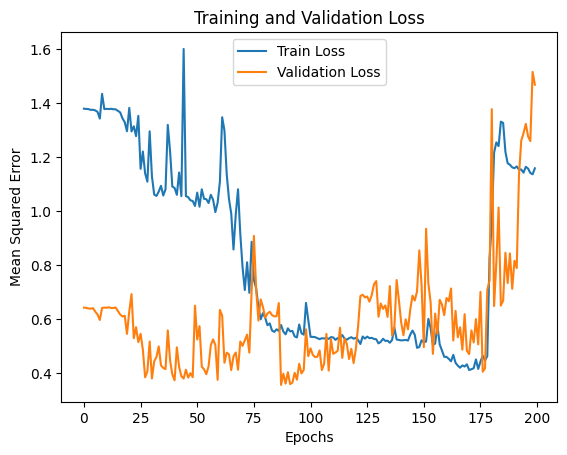

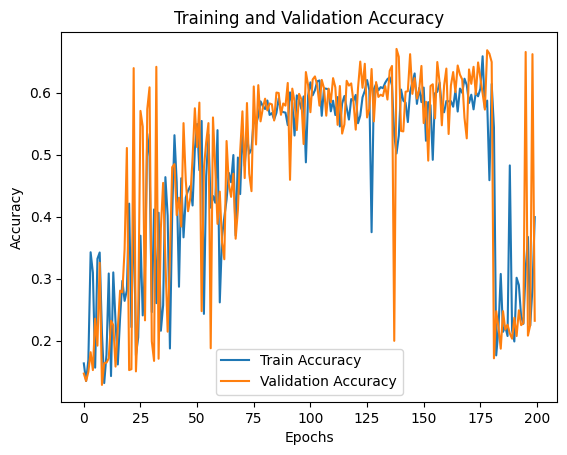

1/1 [==============================] - 1s 676ms/step


In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load your dataset
data = merged_df

# Extract relevant columns
returns = data['total_returns'].values
stock_percentage = data['Stocks_per_returns'].values
bond_percentage = data['Bonds_per_returns'].values
dollar_percentage = data['Cash_per_returns'].values

# Combine the input features and target variables
X_ts7 = np.column_stack((returns, stock_percentage, bond_percentage, dollar_percentage))
y_ts7 = np.column_stack((stock_percentage, bond_percentage, dollar_percentage))

# Normalize the data
scaler = StandardScaler()
X_ts7 = scaler.fit_transform(X_ts7)
y_ts7 = scaler.fit_transform(y_ts7)

# Split the dataset into training and testing sets
X_train_ts7, X_test_ts7, y_train_ts7, y_test_ts7 = train_test_split(X_ts7, y_ts7, test_size=0.2, random_state=42)

# Create time series sequences for 7 days
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+1:i+sequence_length+1])  # Shifted by 1 for the next 7 days
    return np.array(X), np.array(y)

sequence_length = 7  # You want to predict the next 7 days
X_train_seq_ts7, y_train_seq_ts7 = create_sequences(X_train_ts7, sequence_length)
X_test_seq_ts7, y_test_seq_ts7 = create_sequences(X_test_ts7, sequence_length)

# Ensure that y_train_seq has the shape (batch_size, 7, 2) for stock and bond percentages
y_train_seq_ts7 = y_train_seq_ts7[:, :, 1:]  # Keep only the first two columns
y_test_seq_ts7 = y_test_seq_ts7[:, :, 1:]

X_train_seq_ts7, X_val_seq_ts7, y_train_seq_ts7, y_val_seq_ts7 = train_test_split(X_train_seq_ts7, y_train_seq_ts7, test_size=0.2, random_state=42)

# X_train_seq_ts7 = X_train_seq_ts7.reshape(-1, sequence_length, X_train_seq_ts7.shape[2])
# X_val_seq_ts7 = X_val_seq_ts7.reshape(-1, sequence_length, X_val_seq_ts7.shape[2])

# Build the LSTM model
model_ts7 = Sequential()
model_ts7.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, X_train_seq_ts7.shape[2])))
model_ts7.add(LSTM(units=50, activation='relu', return_sequences=True))
model_ts7.add(LSTM(units=50, activation='relu', return_sequences=True))
model_ts7.add(Dense(3, activation='linear'))  # Output layer for stocks and bonds percentages

# Compile the model
model_ts7.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['accuracy'])

# Train the model and record training history
history_ts7 = model_ts7.fit(X_train_seq_ts7, y_train_seq_ts7, epochs=200, batch_size=32, validation_data=(X_val_seq_ts7, y_val_seq_ts7))

# Plot training and validation loss
plt.plot(history_ts7.history['loss'], label='Train Loss')
plt.plot(history_ts7.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation loss
plt.plot(history_ts7.history['accuracy'], label='Train Accuracy')
plt.plot(history_ts7.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Use the trained model to make predictions for the next 7 days
input_sequence = X_test_seq_ts7[0].reshape(1, sequence_length, X_train_ts7.shape[1])
predicted_percentages = model_ts7.predict(input_sequence)


Epoch 1/250
26/26 [==============================] - 7s 51ms/step - loss: 1.3800 - accuracy: 0.3332 - val_loss: 0.6453 - val_accuracy: 0.1738
Epoch 2/250
26/26 [==============================] - 0s 15ms/step - loss: 1.3796 - accuracy: 0.1522 - val_loss: 0.6425 - val_accuracy: 0.2027
Epoch 3/250
26/26 [==============================] - 0s 17ms/step - loss: 1.3774 - accuracy: 0.3224 - val_loss: 0.6374 - val_accuracy: 0.3476
Epoch 4/250
26/26 [==============================] - 0s 17ms/step - loss: 1.3792 - accuracy: 0.3673 - val_loss: 0.6446 - val_accuracy: 0.1703
Epoch 5/250
26/26 [==============================] - 0s 17ms/step - loss: 1.3787 - accuracy: 0.1723 - val_loss: 0.6402 - val_accuracy: 0.1689
Epoch 6/250
26/26 [==============================] - 0s 17ms/step - loss: 1.3765 - accuracy: 0.2075 - val_loss: 0.6398 - val_accuracy: 0.2280
Epoch 7/250
26/26 [==============================] - 0s 19ms/step - loss: 1.3741 - accuracy: 0.2958 - val_loss: 0.6386 - val_accuracy: 0.1534
Epoch 

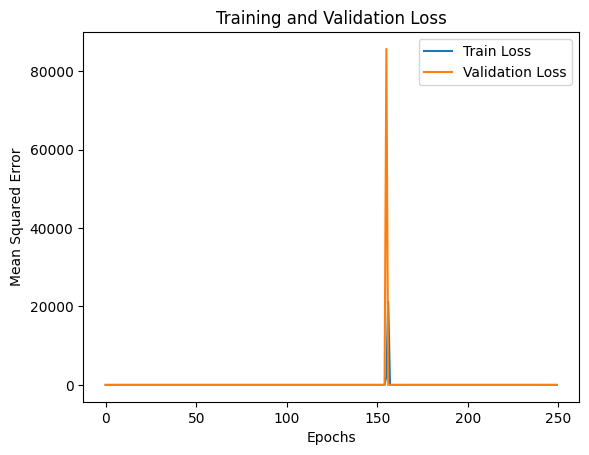

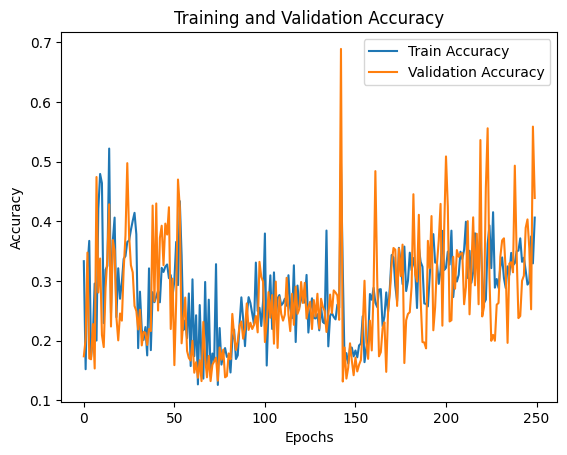

1/1 [==============================] - 1s 673ms/step


In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load your dataset
data = merged_df

# Extract relevant columns
returns = data['total_returns'].values
stock_percentage = data['Stocks_per_returns'].values
bond_percentage = data['Bonds_per_returns'].values
dollar_percentage = data['Cash_per_returns'].values

# Combine the input features and target variables
X_ts7 = np.column_stack((returns, stock_percentage, bond_percentage, dollar_percentage))
y_ts7 = np.column_stack((stock_percentage, bond_percentage, dollar_percentage))

# Normalize the data
scaler = StandardScaler()
X_ts7 = scaler.fit_transform(X_ts7)
y_ts7 = scaler.fit_transform(y_ts7)

# Split the dataset into training and testing sets
X_train_ts7, X_test_ts7, y_train_ts7, y_test_ts7 = train_test_split(X_ts7, y_ts7, test_size=0.2, random_state=42)

# Create time series sequences for 7 days
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+1:i+sequence_length+1])  # Shifted by 1 for the next 7 days
    return np.array(X), np.array(y)

sequence_length = 7  # You want to predict the next 7 days
X_train_seq_ts7, y_train_seq_ts7 = create_sequences(X_train_ts7, sequence_length)
X_test_seq_ts7, y_test_seq_ts7 = create_sequences(X_test_ts7, sequence_length)

# Ensure that y_train_seq has the shape (batch_size, 7, 2) for stock and bond percentages
y_train_seq_ts7 = y_train_seq_ts7[:, :, 1:]  # Keep only the first two columns
y_test_seq_ts7 = y_test_seq_ts7[:, :, 1:]

X_train_seq_ts7, X_val_seq_ts7, y_train_seq_ts7, y_val_seq_ts7 = train_test_split(X_train_seq_ts7, y_train_seq_ts7, test_size=0.2, random_state=42)

# X_train_seq_ts7 = X_train_seq_ts7.reshape(-1, sequence_length, X_train_seq_ts7.shape[2])
# X_val_seq_ts7 = X_val_seq_ts7.reshape(-1, sequence_length, X_val_seq_ts7.shape[2])

# Build the LSTM model
model_ts71 = Sequential()
model_ts71.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, X_train_seq_ts7.shape[2])))
model_ts71.add(LSTM(units=50, activation='relu', return_sequences=True))
model_ts71.add(LSTM(units=50, activation='relu', return_sequences=True))
model_ts71.add(Dense(3, activation='linear'))  # Output layer for stocks and bonds percentages

# Compile the model
model_ts71.compile(optimizer=Adam(learning_rate=0.009), loss='mean_squared_error', metrics=['accuracy'])

# Train the model and record training history
history_ts71 = model_ts71.fit(X_train_seq_ts7, y_train_seq_ts7, epochs=250, batch_size=32, validation_data=(X_val_seq_ts7, y_val_seq_ts7))

# Plot training and validation loss
plt.plot(history_ts71.history['loss'], label='Train Loss')
plt.plot(history_ts71.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation loss
plt.plot(history_ts71.history['accuracy'], label='Train Accuracy')
plt.plot(history_ts71.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Use the trained model to make predictions for the next 7 days
input_sequence = X_test_seq_ts7[0].reshape(1, sequence_length, X_train_ts7.shape[1])
predicted_percentages = model_ts71.predict(input_sequence)


Epoch 1/200
26/26 [==============================] - 5s 41ms/step - loss: 1.3793 - accuracy: 0.3129 - val_loss: 0.6427 - val_accuracy: 0.1626
Epoch 2/200
26/26 [==============================] - 0s 12ms/step - loss: 1.3776 - accuracy: 0.3104 - val_loss: 0.6422 - val_accuracy: 0.1710
Epoch 3/200
26/26 [==============================] - 0s 16ms/step - loss: 1.3765 - accuracy: 0.2412 - val_loss: 0.6351 - val_accuracy: 0.2702
Epoch 4/200
26/26 [==============================] - 0s 18ms/step - loss: 1.3788 - accuracy: 0.2516 - val_loss: 0.6429 - val_accuracy: 0.1851
Epoch 5/200
26/26 [==============================] - 0s 15ms/step - loss: 1.3759 - accuracy: 0.2386 - val_loss: 0.6404 - val_accuracy: 0.2090
Epoch 6/200
26/26 [==============================] - 0s 11ms/step - loss: 1.3740 - accuracy: 0.2462 - val_loss: 0.6369 - val_accuracy: 0.4602
Epoch 7/200
26/26 [==============================] - 0s 11ms/step - loss: 1.3690 - accuracy: 0.1782 - val_loss: 0.6332 - val_accuracy: 0.1464
Epoch 

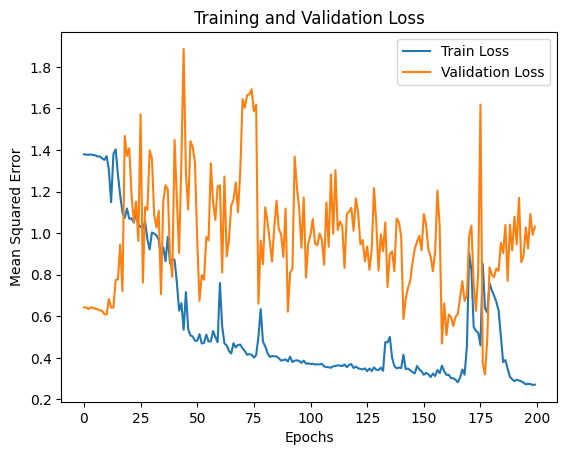

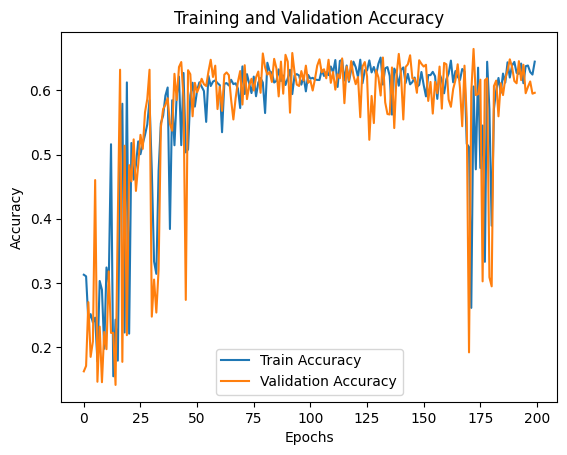

1/1 [==============================] - 1s 543ms/step


In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load your dataset
data = merged_df

# Extract relevant columns
returns = data['total_returns'].values
stock_percentage = data['Stocks_per_returns'].values
bond_percentage = data['Bonds_per_returns'].values
dollar_percentage = data['Cash_per_returns'].values

# Combine the input features and target variables
X_ts7 = np.column_stack((returns, stock_percentage, bond_percentage, dollar_percentage))
y_ts7 = np.column_stack((stock_percentage, bond_percentage, dollar_percentage))

# Normalize the data
scaler = StandardScaler()
X_ts7 = scaler.fit_transform(X_ts7)
y_ts7 = scaler.fit_transform(y_ts7)

# Split the dataset into training and testing sets
X_train_ts7, X_test_ts7, y_train_ts7, y_test_ts7 = train_test_split(X_ts7, y_ts7, test_size=0.2, random_state=42)

# Create time series sequences for 7 days
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+1:i+sequence_length+1])  # Shifted by 1 for the next 7 days
    return np.array(X), np.array(y)

sequence_length = 7  # You want to predict the next 7 days
X_train_seq_ts7, y_train_seq_ts7 = create_sequences(X_train_ts7, sequence_length)
X_test_seq_ts7, y_test_seq_ts7 = create_sequences(X_test_ts7, sequence_length)

# Ensure that y_train_seq has the shape (batch_size, 7, 2) for stock and bond percentages
y_train_seq_ts7 = y_train_seq_ts7[:, :, 1:]  # Keep only the first two columns
y_test_seq_ts7 = y_test_seq_ts7[:, :, 1:]

X_train_seq_ts7, X_val_seq_ts7, y_train_seq_ts7, y_val_seq_ts7 = train_test_split(X_train_seq_ts7, y_train_seq_ts7, test_size=0.2, random_state=42)

# X_train_seq_ts7 = X_train_seq_ts7.reshape(-1, sequence_length, X_train_seq_ts7.shape[2])
# X_val_seq_ts7 = X_val_seq_ts7.reshape(-1, sequence_length, X_val_seq_ts7.shape[2])

# Build the LSTM model
model_ts72 = Sequential()
model_ts72.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, X_train_seq_ts7.shape[2])))
model_ts72.add(LSTM(units=50, activation='relu', return_sequences=True))
model_ts72.add(Dense(3, activation='linear'))  # Output layer for stocks and bonds percentages

# Compile the model
model_ts72.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['accuracy'])

# Train the model and record training history
history_ts72 = model_ts72.fit(X_train_seq_ts7, y_train_seq_ts7, epochs=200, batch_size=32, validation_data=(X_val_seq_ts7, y_val_seq_ts7))

# Plot training and validation loss
plt.plot(history_ts72.history['loss'], label='Train Loss')
plt.plot(history_ts72.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation loss
plt.plot(history_ts72.history['accuracy'], label='Train Accuracy')
plt.plot(history_ts72.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Use the trained model to make predictions for the next 7 days
input_sequence = X_test_seq_ts7[0].reshape(1, sequence_length, X_train_ts7.shape[1])
predicted_percentages = model_ts72.predict(input_sequence)


In [24]:
def pred_allocations(n):
    # n = int(input('Which day starting from today as 0th day you would like the prediction for:'))
    while n>6:
        print('Please enter value less than equal to 6')
        n = int(input('Which day starting from today as 0th day you would like the prediction for:'))
    input_sequence = X_test_seq_ts7[-1].reshape(1, sequence_length, X_train_ts7.shape[1])
    predicted_percentages = model_ts72.predict(input_sequence)
    return predicted_percentages


In [25]:
def get_percentage_allocations():
    n = int(input('Which day starting from today as 0th day you would like the prediction for:'))
    predicted_percentages = pred_allocations(n)
    total = sum(predicted_percentages[0][n])
    new_total = 0
    pred_dict = {}
    pred_dict['pred_stocks'] = predicted_percentages[0][n][0]
    pred_dict['pred_bonds'] = predicted_percentages[0][n][1]
    pred_dict['pred_cash'] = predicted_percentages[0][n][2]
    if total>0:
        for key in pred_dict.keys():
            if pred_dict[key]>0:
                new_total += pred_dict[key]
            else:
                pred_dict[key] = 0
    else:
        for key in pred_dict.keys():
            if pred_dict[key]<0:
                new_total += pred_dict[key]
            else:
                pred_dict[key] = 0

    pred_dict["pred_stocks"] = pred_dict["pred_stocks"]*100/new_total
    pred_dict["pred_bonds"] = pred_dict["pred_bonds"]*100/new_total
    pred_dict["pred_cash"] = pred_dict["pred_cash"]*100/new_total
    
    return pred_dict
    # print(f'Percentage of Stocks Allocation = {pred_dict["pred_stocks"]*100/new_total}\nPercentage of Bonds Allocation = {pred_dict["pred_bonds"]*100/new_total}\nPercentage of Cash Allocation = {pred_dict["pred_cash"]*100/new_total}')

In [27]:
pred_dict = get_percentage_allocations()
print(f'Percentage of Stocks Allocation = {pred_dict["pred_stocks"]}\nPercentage of Bonds Allocation = {pred_dict["pred_bonds"]}\nPercentage of Cash Allocation = {pred_dict["pred_cash"]}')

Which day starting from today as 0th day you would like the prediction for: 5


1/1 [==============================] - 0s 41ms/step
Percentage of Stocks Allocation = 59.19705180260131
Percentage of Bonds Allocation = -0.0
Percentage of Cash Allocation = 40.80294819739869


In [28]:
import pickle
model_json = model_ts72.to_json()

# Save the model architecture to a JSON file
with open('asset_allocation_model.json', 'w') as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model_ts72.save_weights('C:/Users/kaush/Documents/CDS/asset_allocation_weights.h5')


# Create a dictionary to store the model architecture and weights
model_data = {
    'model_json': model_json
}

# Save the model data to a binary file
with open('C:/Users/kaush/Documents/CDS/asset_allocation.bin', 'wb') as model_file:
    pickle.dump(model_data, model_file)


In [110]:
import pickle

with open('C:/Users/kaush/Documents/CDS/asset_allocation.bin', 'rb') as model_file:
    model_data = pickle.load(model_file)


In [111]:
model_data

{'model_json': '{"class_name": "Sequential", "config": {"name": "sequential_16", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 7, 4], "dtype": "float32", "sparse": false, "ragged": false, "name": "lstm_48_input"}}, {"class_name": "LSTM", "config": {"name": "lstm_48", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 7, 4], "return_sequences": true, "return_state": false, "go_backwards": false, "stateful": false, "unroll": false, "time_major": false, "units": 50, "activation": "relu", "recurrent_activation": "sigmoid", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "recurrent_initializer": {"class_name": "Orthogonal", "config": {"gain": 1.0, "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "unit_forget_bias": true, "kernel_regularizer": null, "recurrent_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "recur

In [66]:
for day in predicted_percentages[0]:
    print(sum(day))

-0.04870143532752991
0.049465179443359375
-0.08017542958259583
0.015218764543533325
-0.027358561754226685
-0.027446001768112183
-0.02762588858604431


In [126]:
def allocations_personal_info(age, risk_tolerance, investment_goal, income_level, expenses_level, knowledge_experience, family_situation):
    pred_dict = get_percentage_allocations()
# print(f'Percentage of Stocks Allocation = {pred_dict["pred_stocks"]}\nPercentage of Bonds Allocation = {pred_dict["pred_bonds"]}\nPercentage of Cash Allocation = {pred_dict["pred_cash"]}')
    shares_pre_calculated = pred_dict['pred_stocks']
    bonds_pre_calculated = pred_dict['pred_bonds']
    cash_pre_calculated = pred_dict['pred_cash']
    if age > 50:
        shares_allocation_age = 0.5
        bonds_allocation_age = 0.4
        cash_allocation_age = 0.1
    elif age < 30:
        shares_allocation_age = 0.7
        bonds_allocation_age = 0.2
        cash_allocation_age = 0.1
    else:
        shares_allocation_age = 0.6
        bonds_allocation_age = 0.3
        cash_allocation_age = 0.1

    # Update pre-calculated allocations
    shares_pre_calculated *= shares_allocation_age
    bonds_pre_calculated *= bonds_allocation_age
    cash_pre_calculated *= cash_allocation_age

    if risk_tolerance == 'high':
        shares_allocation_rt = 0.7
        bonds_allocation_rt = 0.2
        cash_allocation_rt = 0.1
    elif risk_tolerance == 'low':
        shares_allocation_rt = 0.4
        bonds_allocation_rt = 0.4
        cash_allocation_rt = 0.2
    
    # Update pre-calculated allocations
    shares_pre_calculated *= shares_allocation_rt
    bonds_pre_calculated *= bonds_allocation_rt
    cash_pre_calculated *= cash_allocation_rt

    if investment_goal == 'short-term':
        shares_allocation_ig = 0.3
        bonds_allocation_ig = 0.5
        cash_allocation_ig = 0.2
    elif investment_goal == 'long-term':
        shares_allocation_ig = 0.7
        bonds_allocation_ig = 0.2
        cash_allocation_ig = 0.1
    
    # Update pre-calculated allocations
    shares_pre_calculated *= shares_allocation_ig
    bonds_pre_calculated *= bonds_allocation_ig
    cash_pre_calculated *= cash_allocation_ig

    if income_level == 'high' and expenses_level == 'low':
        shares_allocation_il = 0.6
        bonds_allocation_il = 0.3
        cash_allocation_il = 0.1
    elif income_level == 'low' and expenses_level == 'high':
        shares_allocation_il = 0.4
        bonds_allocation_il = 0.5
        cash_allocation_il = 0.1
    
    # Update pre-calculated allocations
    shares_pre_calculated *= shares_allocation_il
    bonds_pre_calculated *= bonds_allocation_il
    cash_pre_calculated *= cash_allocation_il

    if knowledge_experience == 'low':
        shares_allocation_ke = 0.4
        bonds_allocation_ke = 0.4
        cash_allocation_ke = 0.2
    elif knowledge_experience == 'high':
        shares_allocation_ke = 0.6
        bonds_allocation_ke = 0.3
        cash_allocation_ke = 0.1
    
    # Update pre-calculated allocations
    shares_pre_calculated *= shares_allocation_ke
    bonds_pre_calculated *= bonds_allocation_ke
    cash_pre_calculated *= cash_allocation_ke

    
    if family_situation == 'single_no_children':
        shares_allocation_fs = 0.6
        bonds_allocation_fs = 0.3
        cash_allocation_fs = 0.1
    elif family_situation == 'married_young_children':
        shares_allocation_fs = 0.4
        bonds_allocation_fs = 0.5
        cash_allocation_fs = 0.1
    
    # Update pre-calculated allocations
    shares_pre_calculated *= shares_allocation_fs
    bonds_pre_calculated *= bonds_allocation_fs
    cash_pre_calculated *= cash_allocation_fs

    total_allocation = shares_pre_calculated + bonds_pre_calculated + cash_pre_calculated
    shares_pre_calculated /= total_allocation
    bonds_pre_calculated /= total_allocation
    cash_pre_calculated /= total_allocation

    print(f'Percentage of Stocks Allocation = {shares_pre_calculated*100}\nPercentage of Bonds Allocation = {bonds_pre_calculated*100}\nPercentage of Cash Allocation = {cash_pre_calculated*100}')
    # print(shares_pre_calculated*100, bonds_pre_calculated*100, cash_pre_calculated*100)
    # returns [shares_pre_calculated*100, bonds_pre_calculated*100, cash_pre_calculated*100]


    


In [128]:
allocations_personal_info(25, 'high', 'long-term', 'low', 'high', 'low', 'single_no_children')

Which day starting from today as 0th day you would like the prediction for: 0


1/1 [==============================] - 0s 47ms/step
Percentage of Stocks Allocation = -0.0
Percentage of Bonds Allocation = 93.86441537143418
Percentage of Cash Allocation = 6.135584628565832


In [129]:
input_sequence

array([[[-1.27497625, -0.04653914,  0.04446916, -0.01327889],
        [-0.60927832, -0.11990472,  0.10799061, -0.01647308],
        [-0.28413294, -0.00741466,  0.01534554, -0.02438229],
        [-0.66388619, -0.03836417,  0.03851563, -0.01595414],
        [ 0.62394404,  0.01865152, -0.01381339, -0.00548326],
        [ 0.50726232, -0.05727053,  0.05029488, -0.00440417],
        [-0.24647501, -0.06005388,  0.06101033, -0.02691306]]])